**A 12 page printable calendar PDF using the `reportlab` library**

In [1]:
!pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.8 MB/s eta 0:00:00


In [2]:
import urllib.request
!mkdir fonts
font_url = "https://github.com/google/fonts/raw/main/ofl/kanit/Kanit-Medium.ttf"
urllib.request.urlretrieve(font_url,"fonts/"+font_url.split('/')[-1])
font_url = "https://github.com/google/fonts/raw/main/ofl/kanit/Kanit-SemiBold.ttf"
urllib.request.urlretrieve(font_url,"fonts/"+font_url.split('/')[-1])
font_url = "https://github.com/google/fonts/raw/main/ofl/kanit/Kanit-Bold.ttf"
urllib.request.urlretrieve(font_url,"fonts/"+font_url.split('/')[-1])
font_url = "https://github.com/google/fonts/raw/main/ofl/kanit/Kanit-ExtraBold.ttf"
urllib.request.urlretrieve(font_url,"fonts/"+font_url.split('/')[-1])

('fonts/Kanit-ExtraBold.ttf', <http.client.HTTPMessage at 0x7f8242cf1de0>)

In [3]:
import calendar
import pprint
def merge(row1,row2,end):
  resultrow=[]
  if row2[0]==1 and end==0:
    return row2
  elif row2[0]==1 and end==1:
    return row1
  for index,value in enumerate(row2):
    if value!=0 and row1[index]!=0 and 0 in row2:
      # print("Here")
      SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
      SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
      numerator = str(row1[index])
      # numerator.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
      denominator = str(value)
      # denominator.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
      resultrow.append(numerator.translate(SUP)+"/"+denominator.translate(SUB))
    elif value!=0 and row1[index]==0:
      resultrow.append(value)
    else:
      resultrow.append(row1[index])
  # print("Result Row = ",resultrow)
  return resultrow

# def prefix_weekno(monthtable):

def transform_month(month_no,year):
  month_table = calendar.monthcalendar(year,month_no)
  previous_month = []
  next_month = []
  if month_no==1:
    previous_month=calendar.monthcalendar(year-1,12)
    next_month=calendar.monthcalendar(year,month_no+1)
  elif month_no==12:
    next_month=calendar.monthcalendar(year+1,1)
    previous_month=calendar.monthcalendar(year,month_no-1)
  else:
    previous_month=calendar.monthcalendar(year,month_no-1)
    next_month=calendar.monthcalendar(year,month_no+1)
  # print("Original Table",month_table)
  month_table[0] = merge(previous_month[-1],month_table[0],0)

  if(len(month_table)>5):
    month_table[-2] = merge(month_table[-2],month_table[-1],1)
    del month_table[-1]
  else:
    month_table[-1] = merge(month_table[-1],next_month[0],1)

  return month_table

year=2024
def get_months(year,large_switch):
  week_counter=1

  large_months=[]
  small_months=[]
  for month_no in range(1,13):
    month_table = transform_month(month_no,year)
    # Prefixing week numbers
    for index,value in enumerate(month_table):
      value.insert(0,week_counter)
      if index==4 and value[-1]<=6:
        pass
      else:
        week_counter+=1
    large=[['Week','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
    small=[['W','M', 'T', 'W', 'T', 'F', 'S', 'S']]
    large.extend(month_table)
    small.extend(month_table)
    large_months.append(large)
    small_months.append(small)
  if large_switch == 1:
    return large_months
  elif large_switch == 0:
    return small_months

# Add last month from previous year to the small list

  # print("Transformed Table ",month_table)
# print(transformed_months)
smallmonths = get_months(2024,0)
# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(smallmonths)

In [4]:
import numpy as np
def get_week_of_month(year, month, day):
    x = np.array(calendar.monthcalendar(year, month))
    week_of_month = np.where(x==day)[0][0] + 1
    return(week_of_month)

get_week_of_month(2023,1,2)

2

In [5]:
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.pdfgen import canvas
from reportlab.pdfbase.pdfmetrics import registerFontFamily
import reportlab

# pdfmetrics.registerFont(TTFont('Vera', 'Vera.ttf'))
# pdfmetrics.registerFont(TTFont('VeraBd', 'VeraBd.ttf'))
# pdfmetrics.registerFont(TTFont('VeraIt', 'VeraIt.ttf'))
# pdfmetrics.registerFont(TTFont('VeraBI', 'VeraBI.ttf'))
# registerFontFamily('Vera',normal='Vera',bold='VeraBd',italic='VeraIt',boldItalic='VeraBI')

reportlab.rl_config.TTFSearchPath.append('/content/fonts')
pdfmetrics.registerFont(TTFont('KanitM', 'Kanit-Medium.ttf'))
pdfmetrics.registerFont(TTFont('KanitSB', 'Kanit-SemiBold.ttf'))
pdfmetrics.registerFont(TTFont('KanitB', 'Kanit-Bold.ttf'))
pdfmetrics.registerFont(TTFont('KanitEB', 'Kanit-ExtraBold.ttf'))


In [6]:
from reportlab.lib import colors
from reportlab.lib.pagesizes import A4,letter, inch, landscape
from reportlab.platypus import PageTemplate,SimpleDocTemplate, Table, TableStyle,Frame,BaseDocTemplate

def setBackground(canvas, document):
     color = colors.Color(red=(249.0/255),green=(239.0/255),blue=(219.0/255))
     canvas.setFillColor(color)
     canvas.rect(0,0,doc.width+doc.leftMargin+doc.rightMargin,doc.height+doc.topMargin+doc.bottomMargin, fill=True, stroke=False)

# doc = SimpleDocTemplate("Calendar.pdf", leftMargin=0, rightMargin=0, topMargin=0, bottomMargin=0,pagesize=landscape(A4))
doc = BaseDocTemplate("Calendar.pdf", leftMargin=0, rightMargin=0, topMargin=0, bottomMargin=0,pagesize=landscape(A4))

elements = []

frame1 = Frame(doc.leftMargin, doc.bottomMargin, doc.width, doc.height, id='col1')



def style_table(month,large_switch):
  data1 = month #large_months[0]
  t1 = 0
  if large_switch == 1:
    t1 = Table(data1, 8 * [0.92 * inch], 6 * [0.98 * inch])
    t1_style = TableStyle([
        ('BACKGROUND', (0, 0), (7, 0), colors.Color(red=(249.0/255),green=(239.0/255),blue=(219.0/255))),
        ('BACKGROUND', (0, 1), (7, -1), colors.Color(red=(250.0/255),green=(249.0/255),blue=(229.0/255))),
        ('TEXTCOLOR', (7, 0), (7, 0), colors.Color(red=(220.0/255),green=(20.0/255),blue=(20.0/255))),
        ('TEXTCOLOR', (0, 1), (0, 5), colors.Color(red=(150.0/255),green=(150.0/255),blue=(150.0/255))),
        ('INNERGRID', (0, 0), (-1, -1), 0.1, colors.white),
        ('LINEBELOW', (0,0), (-1,-2), 1, colors.Color(red=(255.0/255),green=(235.0/255),blue=(230.0/255))),
        ('LINEBELOW', (0,-1), (-1,-1), 0.75, colors.black),
        ('LINEBELOW', (0,0), (7,0), 0.75, colors.black),
        ('BOX', (0, 0), (-1, -1), 0.25, colors.Color(red=(255.0/255),green=(235.0/255),blue=(230.0/255))),
        ('TEXTFONT', (0, 0), (-1, -1), 'VeraBd'),
        ('TEXTFONT', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTNAME', (0,0), (-1,-1), 'KanitM'),
        ('FONTNAME', (0,0), (0,-1), 'KanitSB'),
        ('FONTSIZE', (0, 0), (-1, 0), 11),
        ('FONTSIZE', (0, 1), (-1, -1), 32),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ('VALIGN', (0, 1), (-1, -1), 'TOP'),
    ])
  elif large_switch == 0:
    t1 = Table(data1, 8 * [0.4488 * inch], 6 * [0.45 * inch])
    t1_style = TableStyle([
        ('BACKGROUND', (0, 0), (7, 0), colors.Color(red=(249.0/255),green=(239.0/255),blue=(219.0/255))),
        ('BACKGROUND', (0, 1), (7, -1), colors.Color(red=(250.0/255),green=(249.0/255),blue=(229.0/255))),
        ('TEXTCOLOR', (7, 0), (7, 0), colors.Color(red=(220.0/255),green=(20.0/255),blue=(20.0/255))),
        ('TEXTCOLOR', (0, 1), (0, 5), colors.Color(red=(100.0/255),green=(100.0/255),blue=(100.0/255))),
        ('INNERGRID', (0, 0), (-1, -1), 0.1, colors.white),
        ('LINEBELOW', (0,0), (-1,-2), 1, colors.Color(red=(255.0/255),green=(235.0/255),blue=(230.0/255))),
        ('LINEBELOW', (0,-1), (-1,-1), 0.75, colors.black),
        ('LINEBELOW', (0,0), (7,0), 0.75, colors.black),
        ('BOX', (0, 0), (-1, -1), 0.25, colors.Color(red=(255.0/255),green=(235.0/255),blue=(230.0/255))),
        ('TEXTFONT', (0, 0), (-1, -1), 'VeraBd'),
        ('TEXTFONT', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTNAME', (0,0), (-1,-1), 'KanitM'),
        ('FONTSIZE', (0, 0), (-1, 0), 12),
        ('FONTSIZE', (0, 1), (-1, -1), 14),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
    ])
  # pp.pprint(data1)
  for i in range(1,8):
    if data1[1][i] not in range(1,8):
      t1_style.add('TEXTCOLOR', (i, 1), (i, 1), colors.Color(red=(235.0/255),green=(217.0/255),blue=(180.0/255)))
    if data1[5][i] in range(1,8):
      t1_style.add('TEXTCOLOR', (i, 5), (i, 5), colors.Color(red=(235.0/255),green=(217.0/255),blue=(180.0/255)))

  for i in range(6,8):
    if data1[1][i] in range(1,8):
      t1_style.add('TEXTCOLOR', (i, 1), (i, 1), colors.Color(red=(220.0/255),green=(20.0/255),blue=(20.0/255)))
    if data1[5][i] not in range(1,8):
      t1_style.add('TEXTCOLOR', (i, 5), (i, 5), colors.Color(red=(220.0/255),green=(20.0/255),blue=(20.0/255)))
    t1_style.add('TEXTCOLOR', (i, 2), (i, 2), colors.Color(red=(220.0/255),green=(20.0/255),blue=(20.0/255)))
    t1_style.add('TEXTCOLOR', (i, 3), (i, 3), colors.Color(red=(220.0/255),green=(20.0/255),blue=(20.0/255)))
    t1_style.add('TEXTCOLOR', (i, 4), (i, 4), colors.Color(red=(220.0/255),green=(20.0/255),blue=(20.0/255)))


  t1.setStyle(t1_style)
  return t1

def build_calendar(year):

  large_months = get_months(year,1)


  # for i in large_months:
  #   elements.append(style_table(i,1))
  prev_small_months = get_months(year-1,0)
  small_months = get_months(year,0)
  next_small_months = get_months(year+1,0)
  # data2 = small_months[11]

  for i in range(0,12):
    t1x = style_table(large_months[i],1)
    prev_month=i-1
    prev_year=year
    next_month=i+1
    next_year=year
    t2ax = style_table(small_months[0],0)
    t2bx = style_table(small_months[2],0)
    if i==0:
      prev_month=11
      prev_year=year-1
      t2ax = style_table(prev_small_months[11],0)
      t2bx = style_table(small_months[i+1],0)
    elif i==11:
      next_month=0
      next_year=year+1
      t2ax = style_table(small_months[i-1],0)
      t2bx = style_table(next_small_months[0],0)
    else:
      t2ax = style_table(small_months[i-1],0)
      t2bx = style_table(small_months[i+1],0)

  # t2 = Table(data2, 8 * [0.4 * inch], 6 * [0.2 * inch])
  # t2.setStyle(TableStyle([
  #     ('BACKGROUND', (0, 0), (4, 0), colors.gray),
  #     ('INNERGRID', (0, 0), (-1, -1), 0.25, colors.green),
  #     ('FONTNAME', (0,0), (-1,-1), 'Kanit'),
  #     ('BOX', (0, 0), (-1, -1), 0.25, colors.black),
  # ]))
    datatitle = [[str(year),calendar.month_name[i+1]]]
    title_table=Table(datatitle,2*[3.68*inch],1*[1*inch])
    title_table.setStyle(
      TableStyle([
          ('BACKGROUND', (0, 0), (-1, -1), colors.Color(red=(208.0/255),green=(212.0/255),blue=(202.0/255))),
          ('TEXTCOLOR', (0, 0), (-1, -1), colors.Color(red=(124.0/255),green=(124.0/255),blue=(124.0/255))),
          ('FONTNAME', (0,0), (-1,-1), 'KanitB'),
          ('FONTSIZE', (0, 0), (-1, -1), 40),
          ('TOPPADDING', (0, 0), (-1, -1), 10),
          ('LEFTPADDING', (0, 0), (-1, -1), 10),
          ('RIGHTPADDING', (0, 0), (-1, -1), 10),
          ('ALIGN', (0, 0), (0, 0), 'LEFT'),
          ('ALIGN', (1, 0), (1, 0), 'RIGHT'),
          ('VALIGN', (0, 0), (-1, -1), 'TOP'),
          ('ROUNDEDCORNERS', [5, 5, 5, 5]),
      ]))

    prevtitle = [[str(prev_year),calendar.month_name[prev_month+1]]]
    ptitle_table=Table(prevtitle,2*[1.8*inch],1*[0.5*inch])
    ptitle_table.setStyle(
      TableStyle([
          ('BACKGROUND', (0, 0), (-1, -1), colors.Color(red=(208.0/255),green=(212.0/255),blue=(202.0/255))),
          ('TEXTCOLOR', (0, 0), (-1, -1), colors.Color(red=(124.0/255),green=(124.0/255),blue=(124.0/255))),
          ('FONTNAME', (0,0), (-1,-1), 'KanitB'),
          ('FONTSIZE', (0, 0), (-1, -1), 20),
          ('TOPPADDING', (0, 0), (-1, -1), 3),
          ('LEFTPADDING', (0, 0), (-1, -1), 6),
          ('RIGHTPADDING', (0, 0), (-1, -1), 6),
          ('ALIGN', (0, 0), (0, 0), 'LEFT'),
          ('ALIGN', (1, 0), (1, 0), 'RIGHT'),
          ('VALIGN', (0, 0), (-1, -1), 'TOP'),
          ('ROUNDEDCORNERS', [5, 5, 5, 5]),
      ]))

    nexttitle = [[str(next_year),calendar.month_name[next_month+1]]]
    ntitle_table=Table(nexttitle,2*[1.8*inch],1*[0.5*inch])
    ntitle_table.setStyle(
      TableStyle([
          ('BACKGROUND', (0, 0), (-1, -1), colors.Color(red=(208.0/255),green=(212.0/255),blue=(202.0/255))),
          ('TEXTCOLOR', (0, 0), (-1, -1), colors.Color(red=(124.0/255),green=(124.0/255),blue=(124.0/255))),
          ('FONTNAME', (0,0), (-1,-1), 'KanitB'),
          ('FONTSIZE', (0, 0), (-1, -1), 20),
          ('TOPPADDING', (0, 0), (-1, -1), 3),
          ('LEFTPADDING', (0, 0), (-1, -1), 6),
          ('RIGHTPADDING', (0, 0), (-1, -1), 6),
          ('ALIGN', (0, 0), (0, 0), 'LEFT'),
          ('ALIGN', (1, 0), (1, 0), 'RIGHT'),
          ('VALIGN', (0, 0), (-1, -1), 'TOP'),
          ('ROUNDEDCORNERS', [5, 5, 5, 5]),
      ]))
    # elements.append(title_table)
    left_data = [[title_table],[t1x]]
    left_table = Table(left_data,1*[7.5 * inch],[1*inch,6*inch])
    # left_table.setStyle(
    #     TableStyle([
    #         ('INNERGRID', (0, 0), (-1, -1), 0.1, colors.blue),
    #         ('BOX', (0, 0), (-1, -1), 0.25, colors.black),
    #     ]))

    datasm = [[ptitle_table],[t2ax],[ntitle_table],[t2bx]]
    t2x = Table(datasm,1 * [3.6 * inch], [0.54*inch,2.95 * inch,0.84*inch,2.76*inch])
    t2x.setStyle(
        TableStyle([
            ('VALIGN', (0, 0), (0, 1), 'TOP'),
            ('VALIGN', (0, 1), (0, 1), 'TOP'),
            ('VALIGN', (0, 2), (0, 2), 'BOTTOM'),
            ('VALIGN', (0, 3), (0, 3), 'BOTTOM'),
        ]))

    data = [[left_table, t2x]]
    # adjust the length of tables
    t1_w = 7.6 * 1 * inch
    t2_w = 4 * inch
    shell_table = Table(data, [t1_w, t2_w],[8.1*inch])
    shell_table.setStyle(
        TableStyle([
            ('BACKGROUND', (0, 0), (-1, -1), colors.Color(red=(249.0/255),green=(239.0/255),blue=(219.0/255))),
            ('VALIGN', (0, 0), (-1, -1), 'BOTTOM'),
            ('BOTTOMPADDING', (0, 0), (-1, -1), 10),
            ('RIGHTPADDING', (1, 0), (1, 0), 20),
            ('ALIGN', (1, 0), (1, 0), 'RIGHT'),
        ])
    )
    # elements.append(t1)
    # elements.append(t2)
    elements.append(shell_table)

build_calendar(2024)
doc.addPageTemplates([PageTemplate(id='TwoCol',frames=[frame1],onPage=setBackground) ])
doc.build(elements)

Display PDF

In [7]:
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (420 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


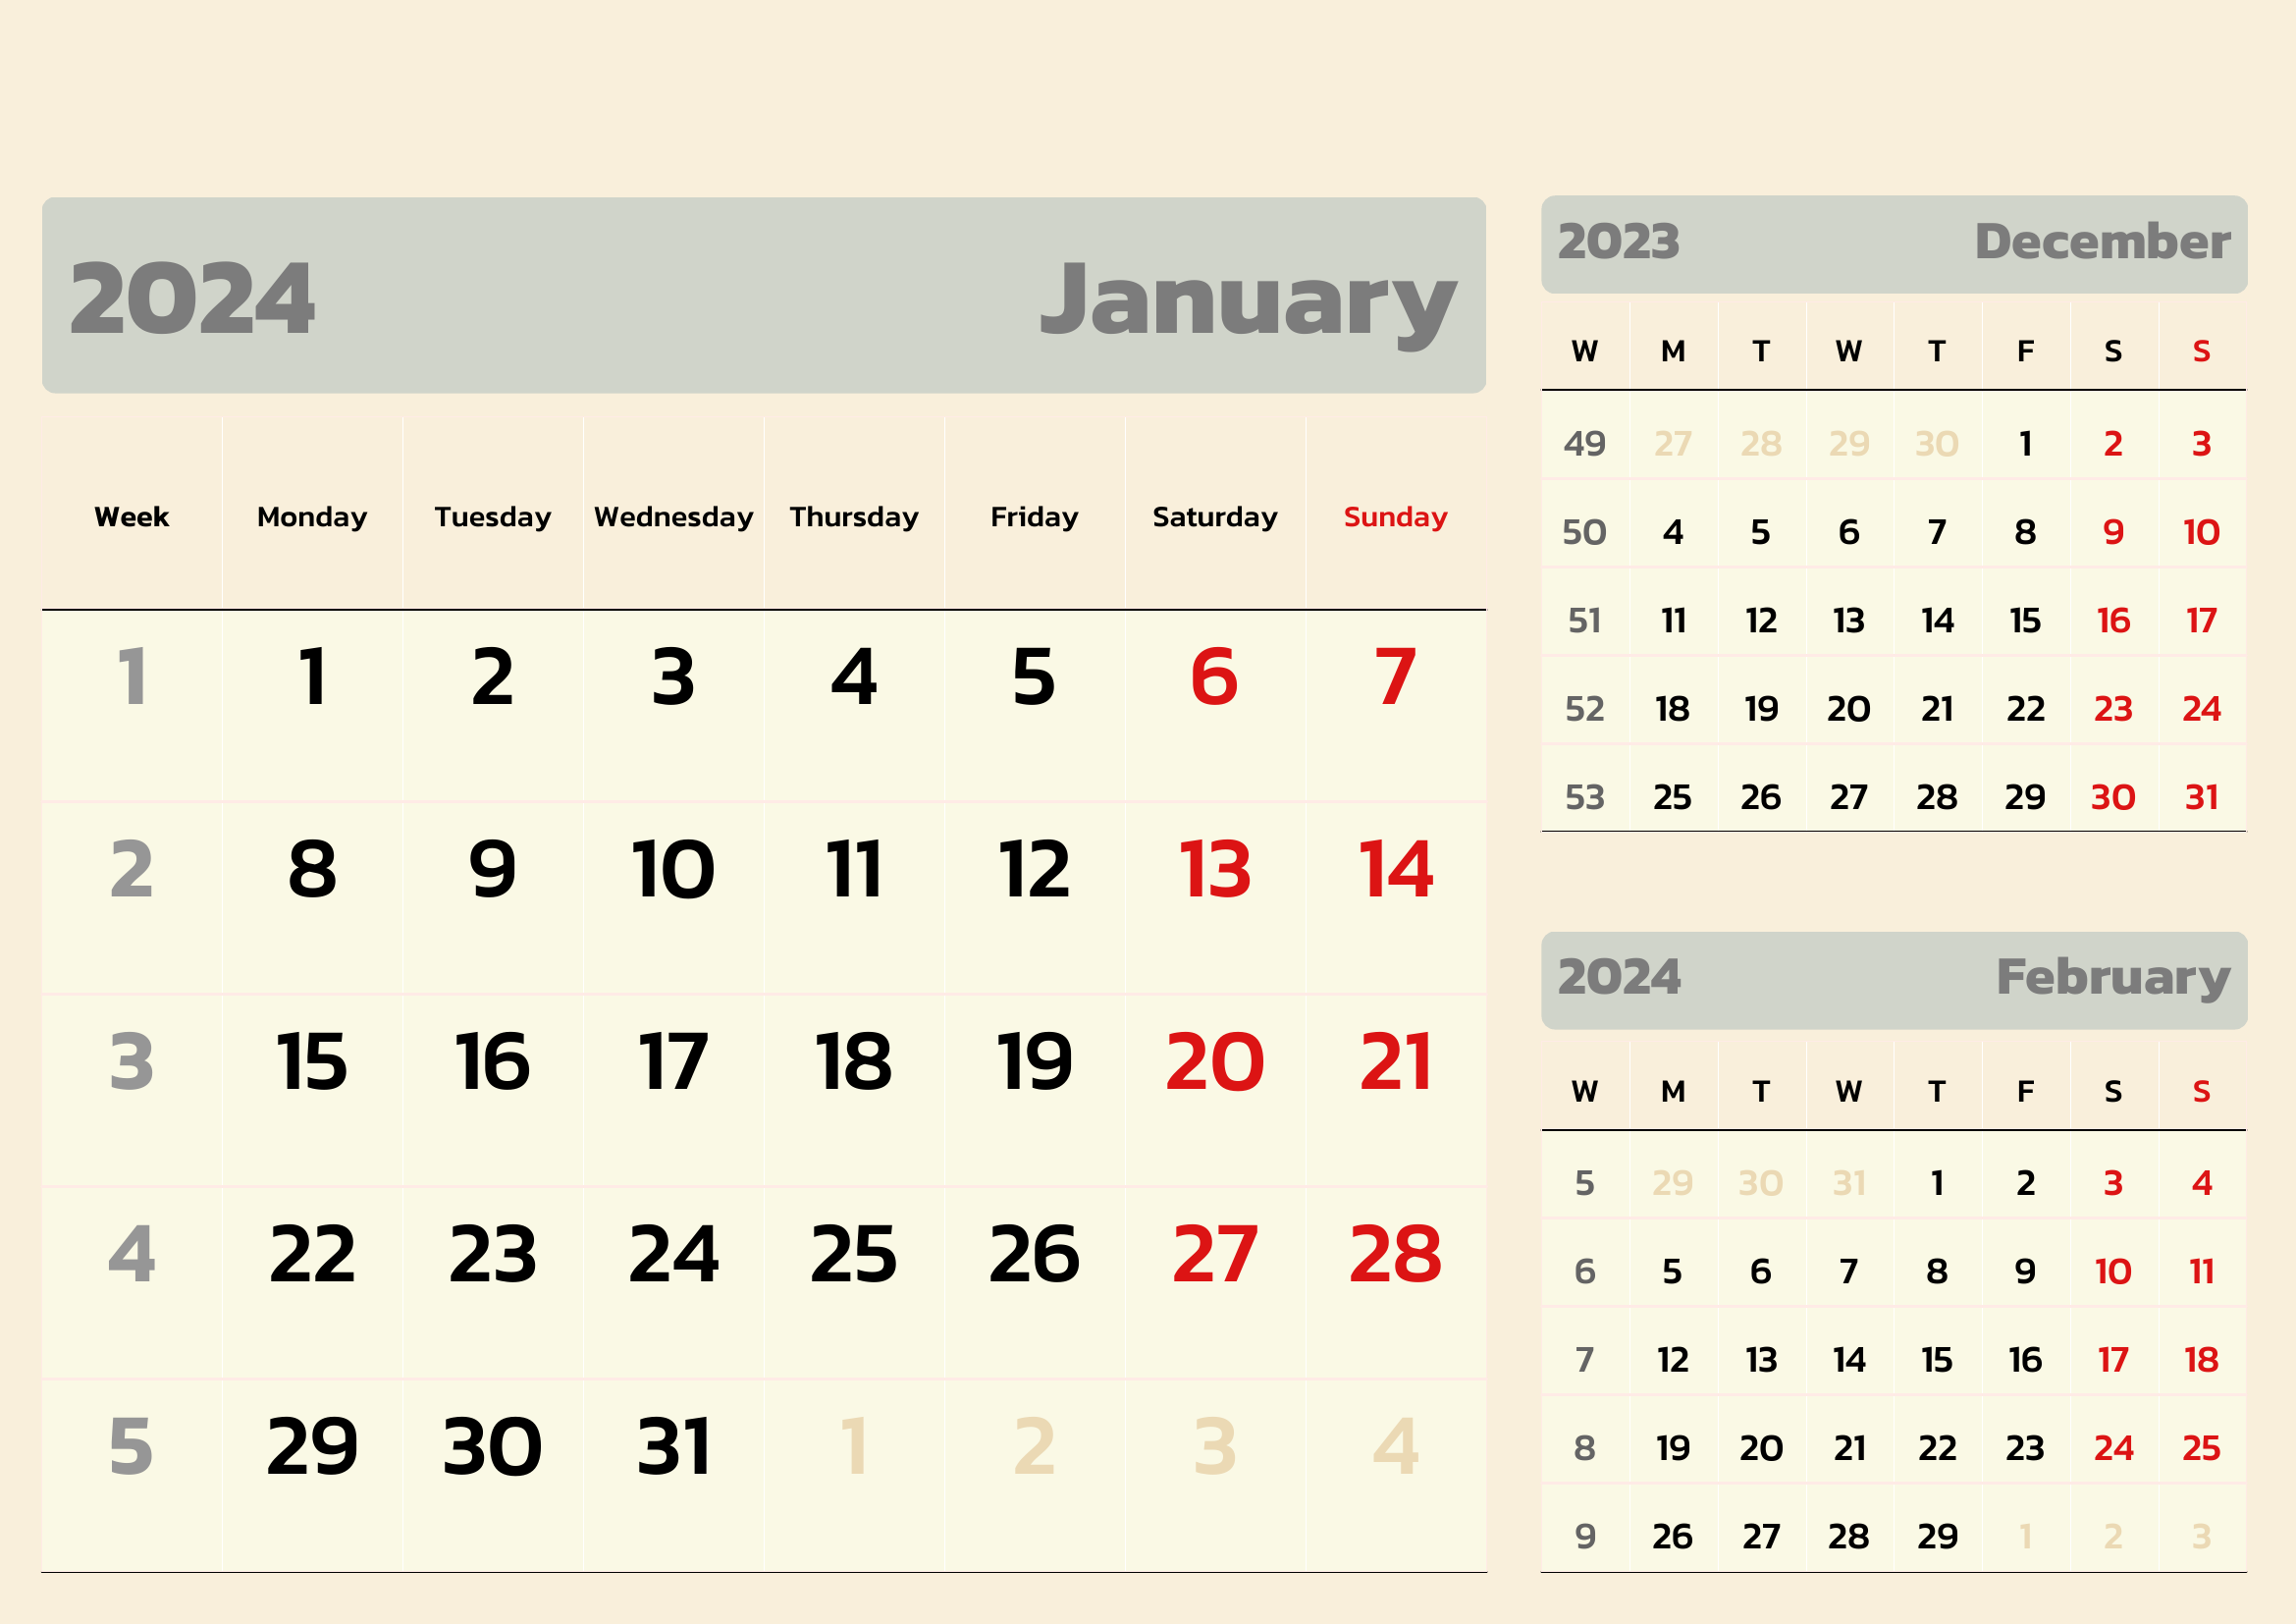

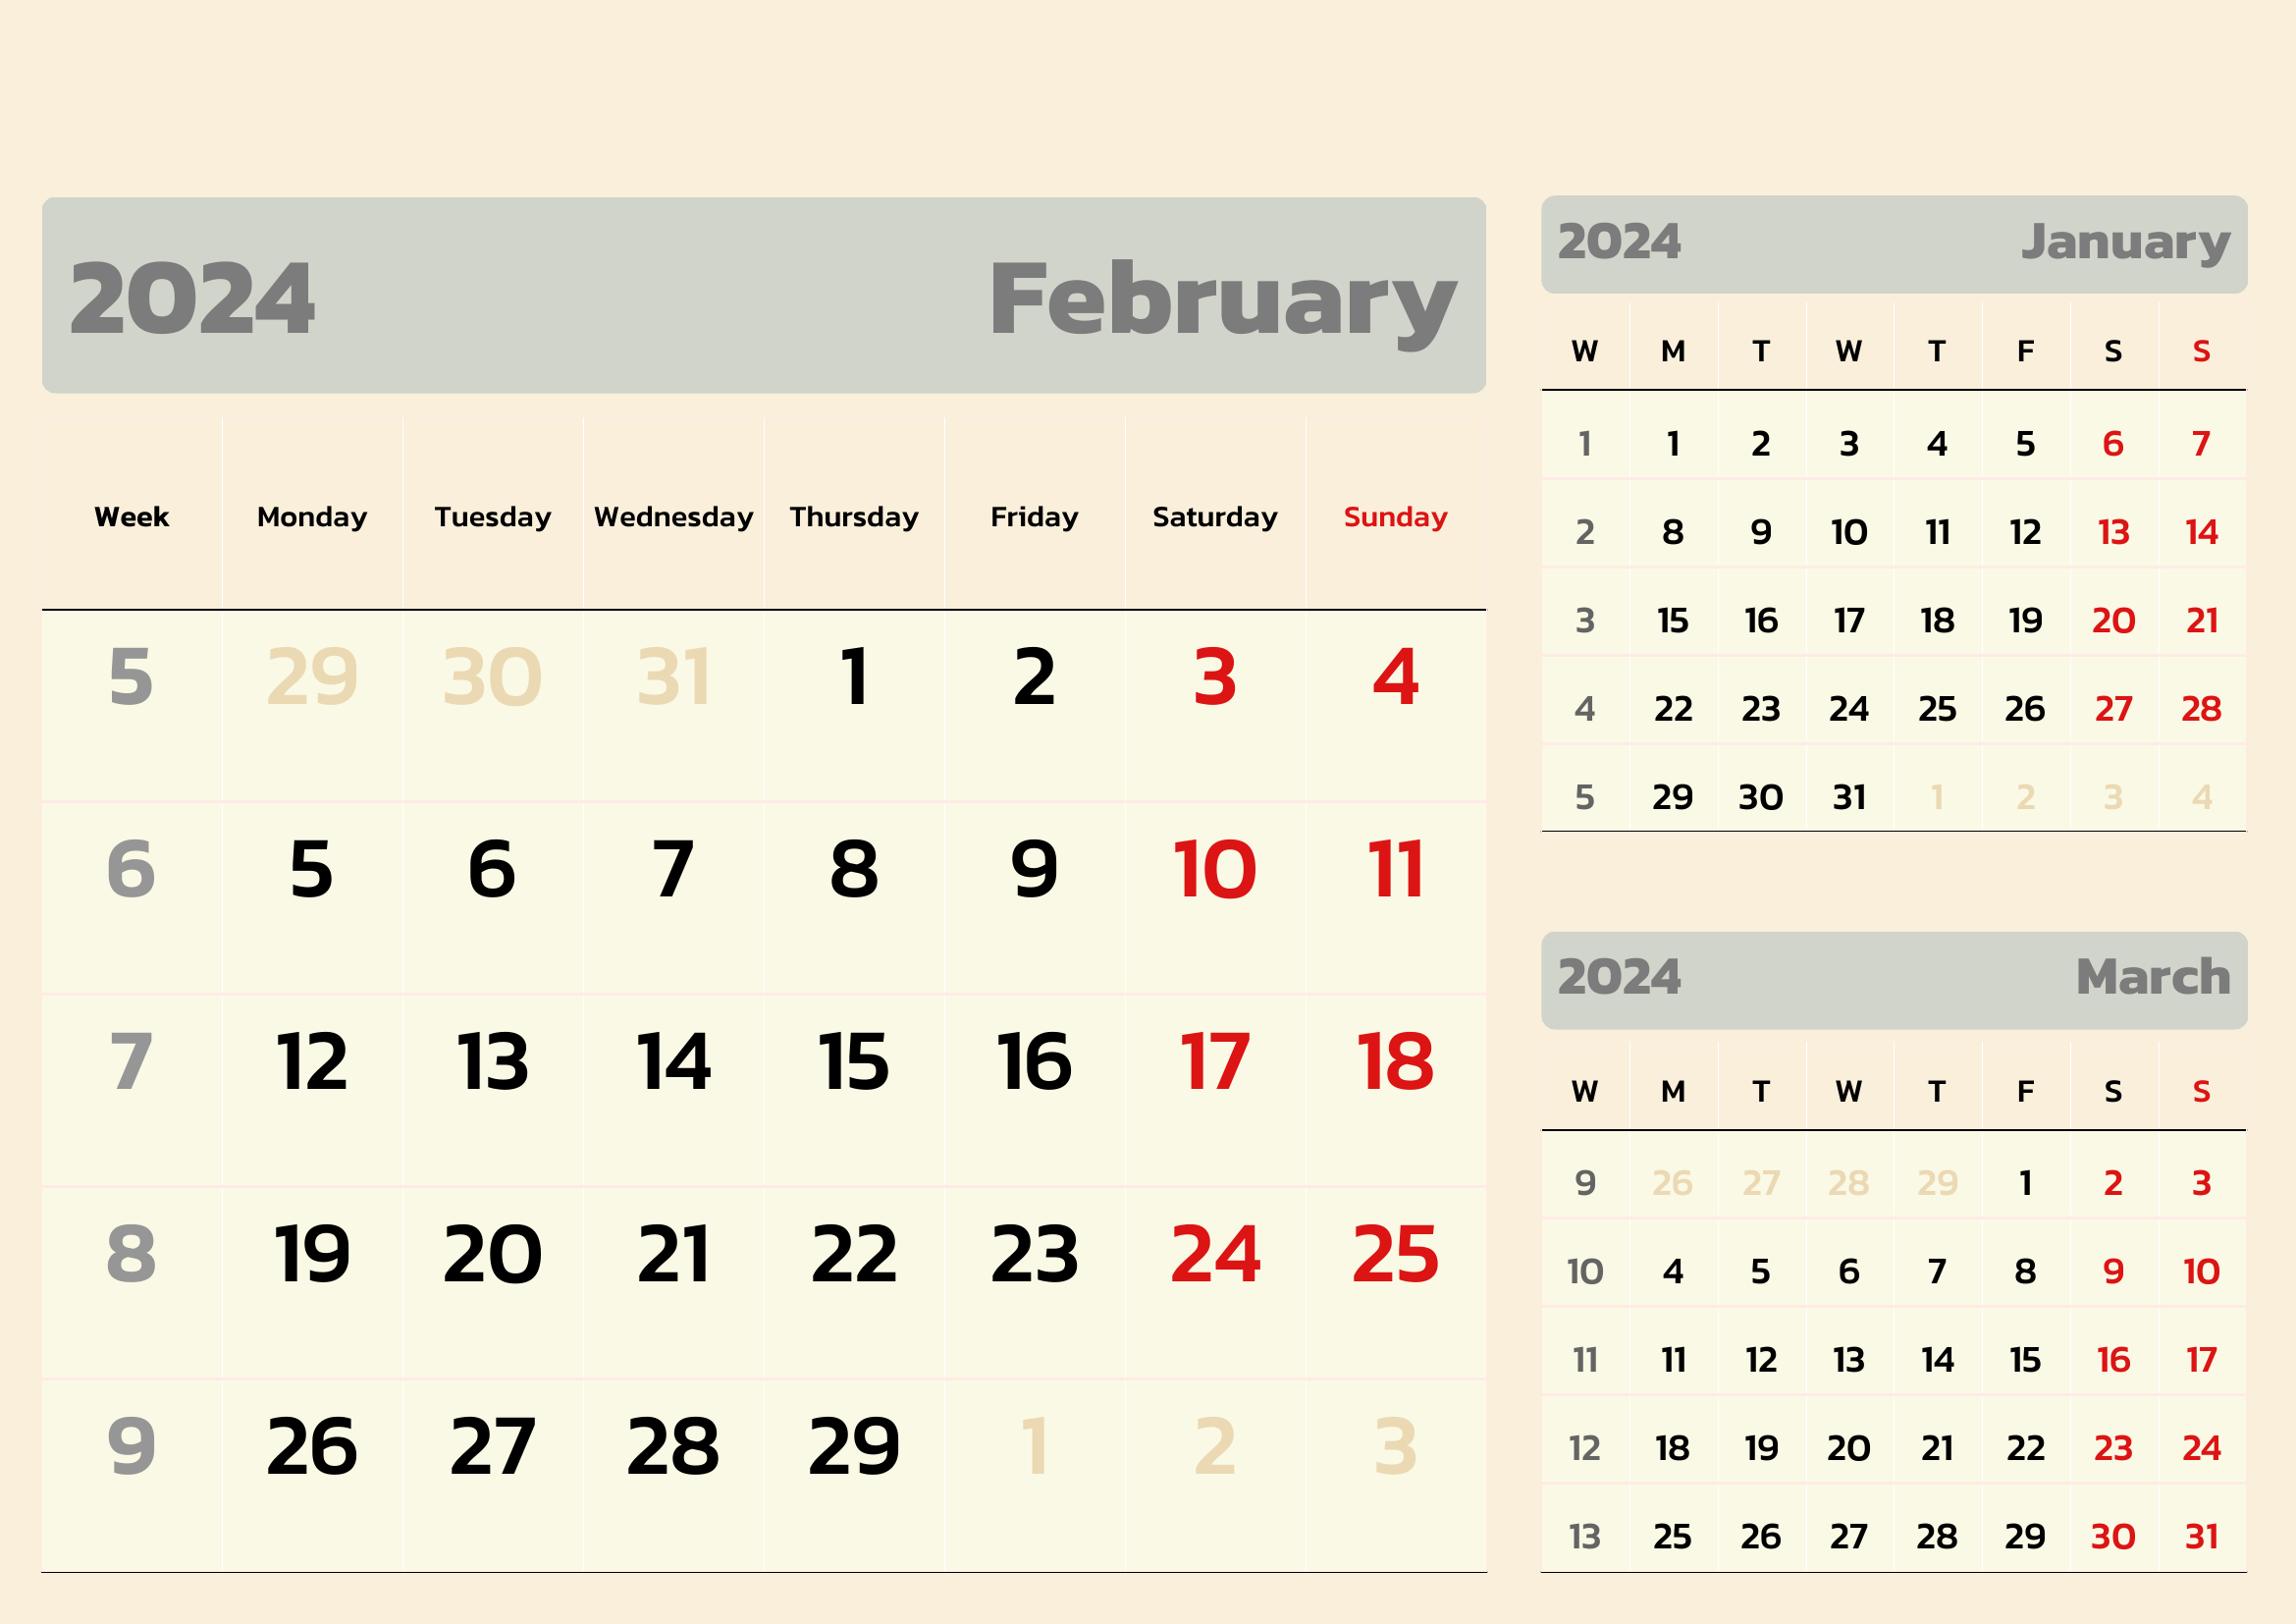

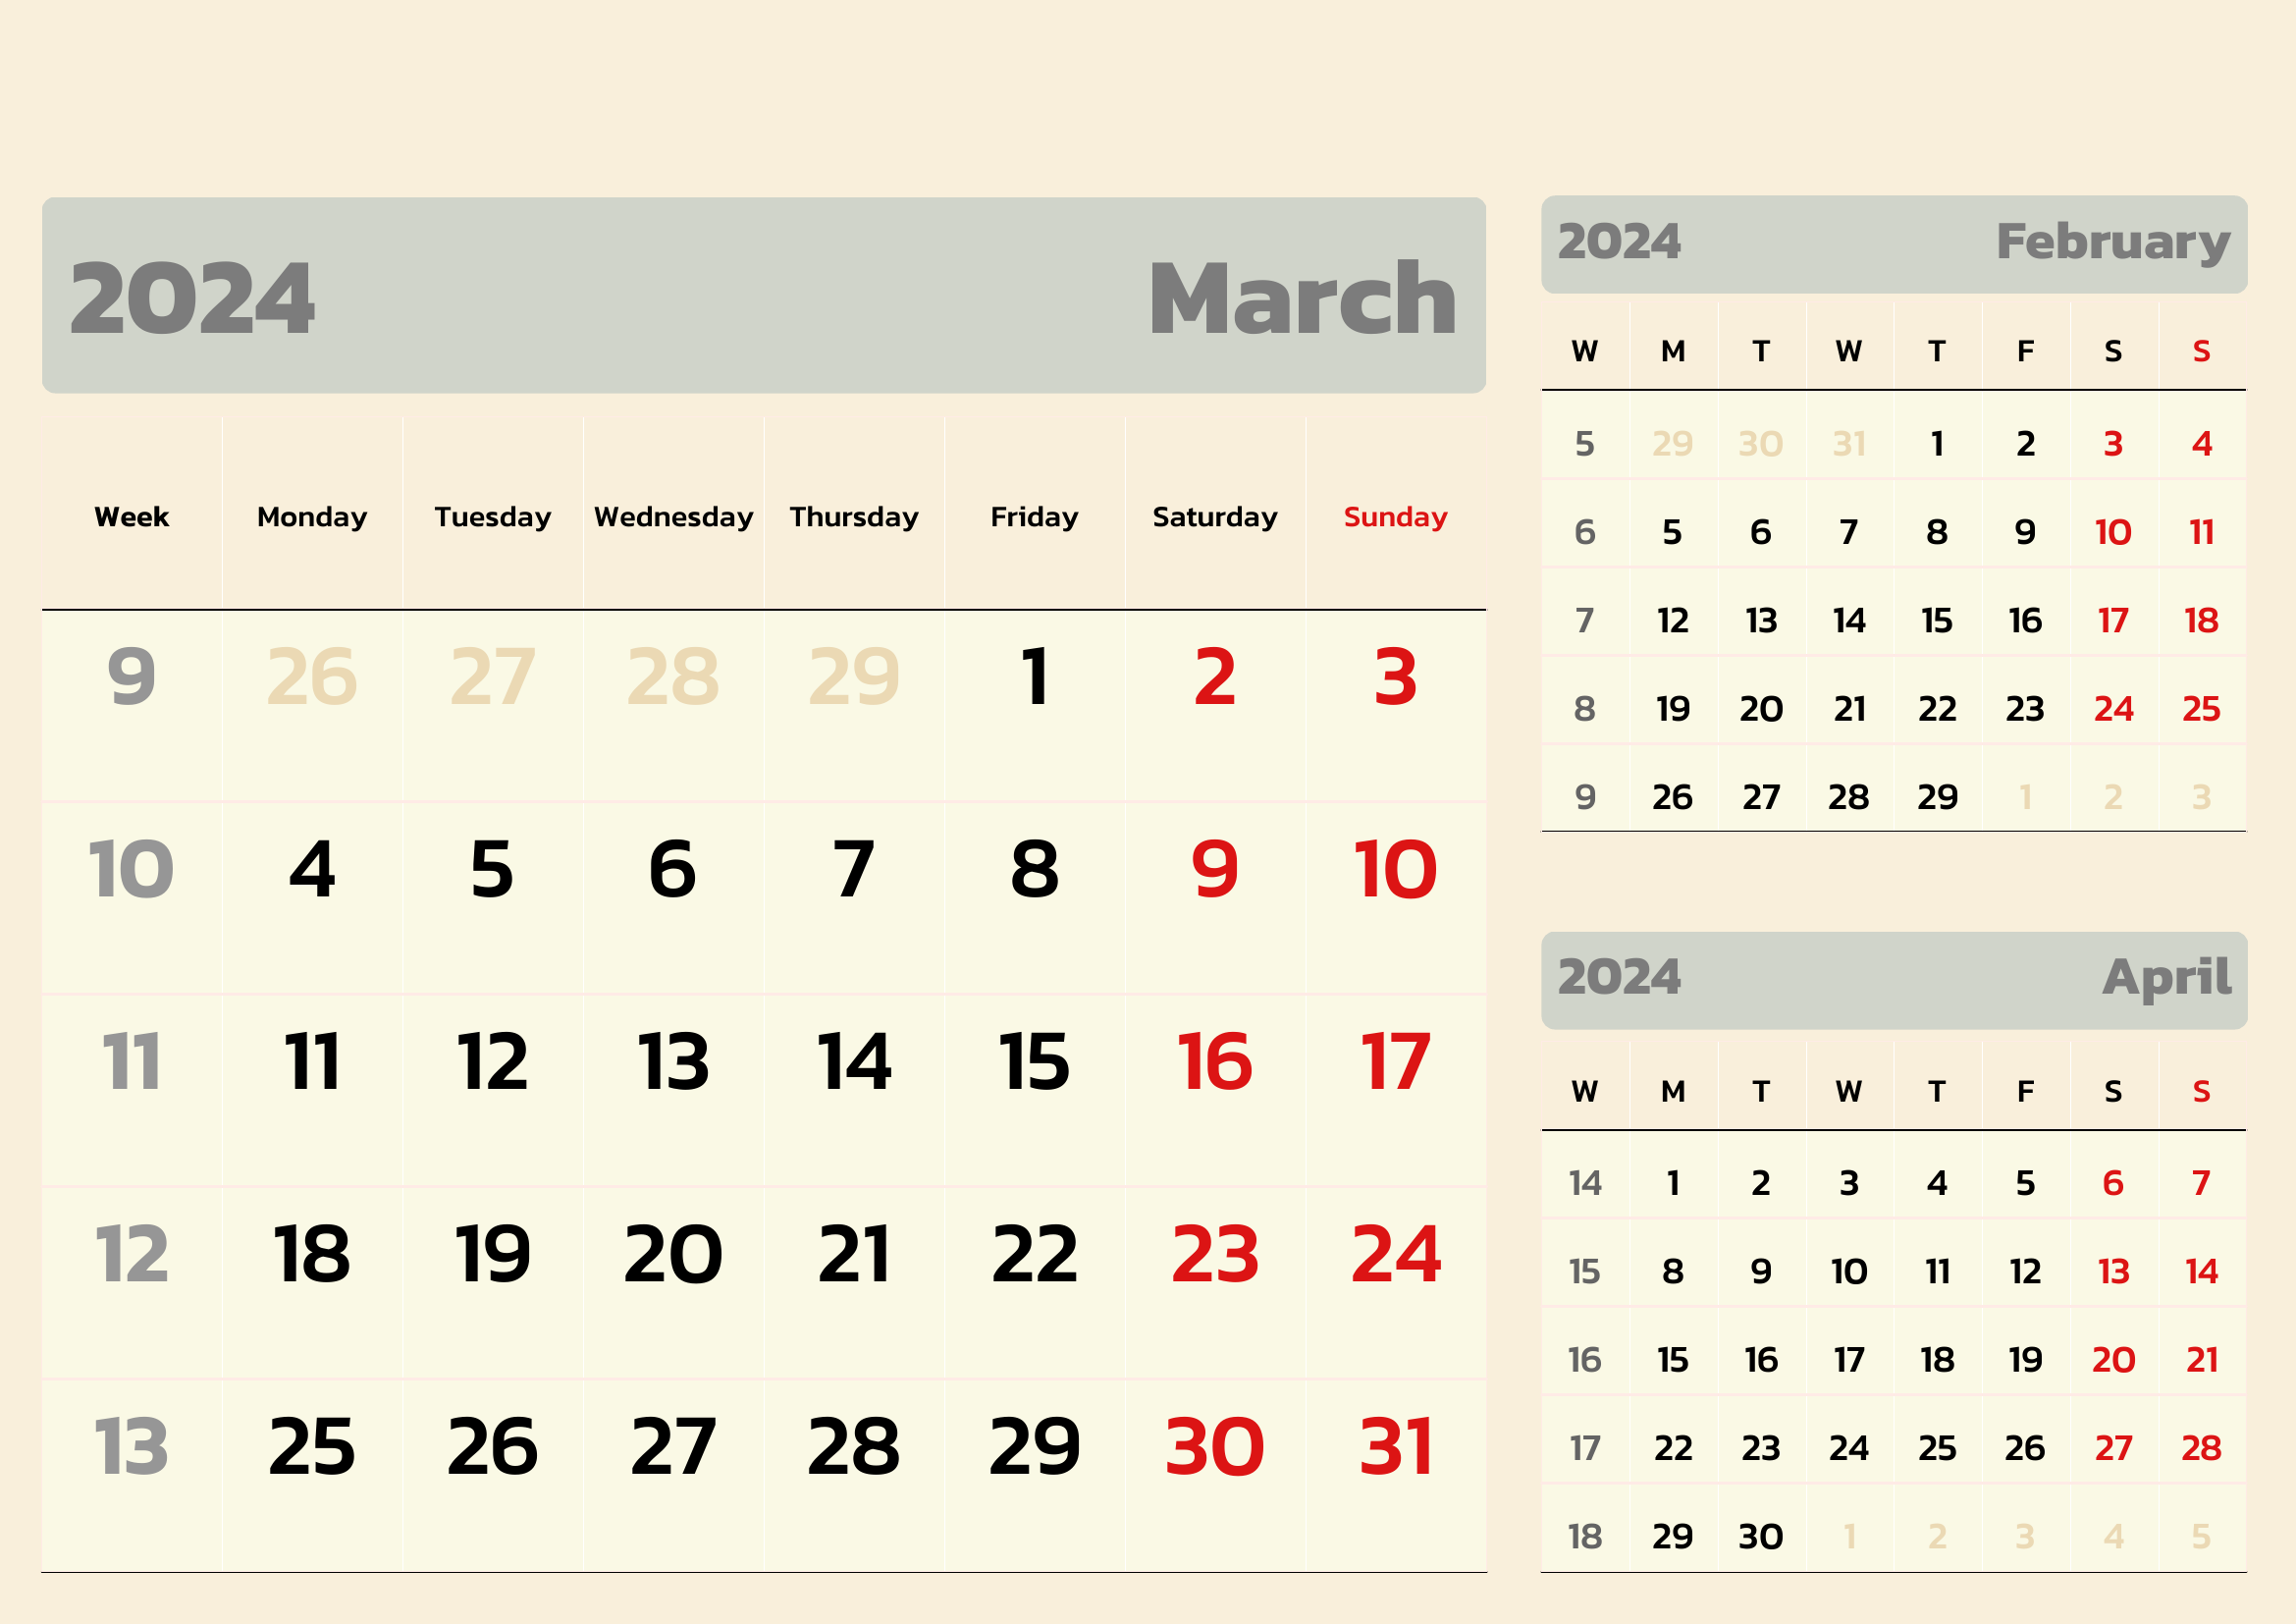

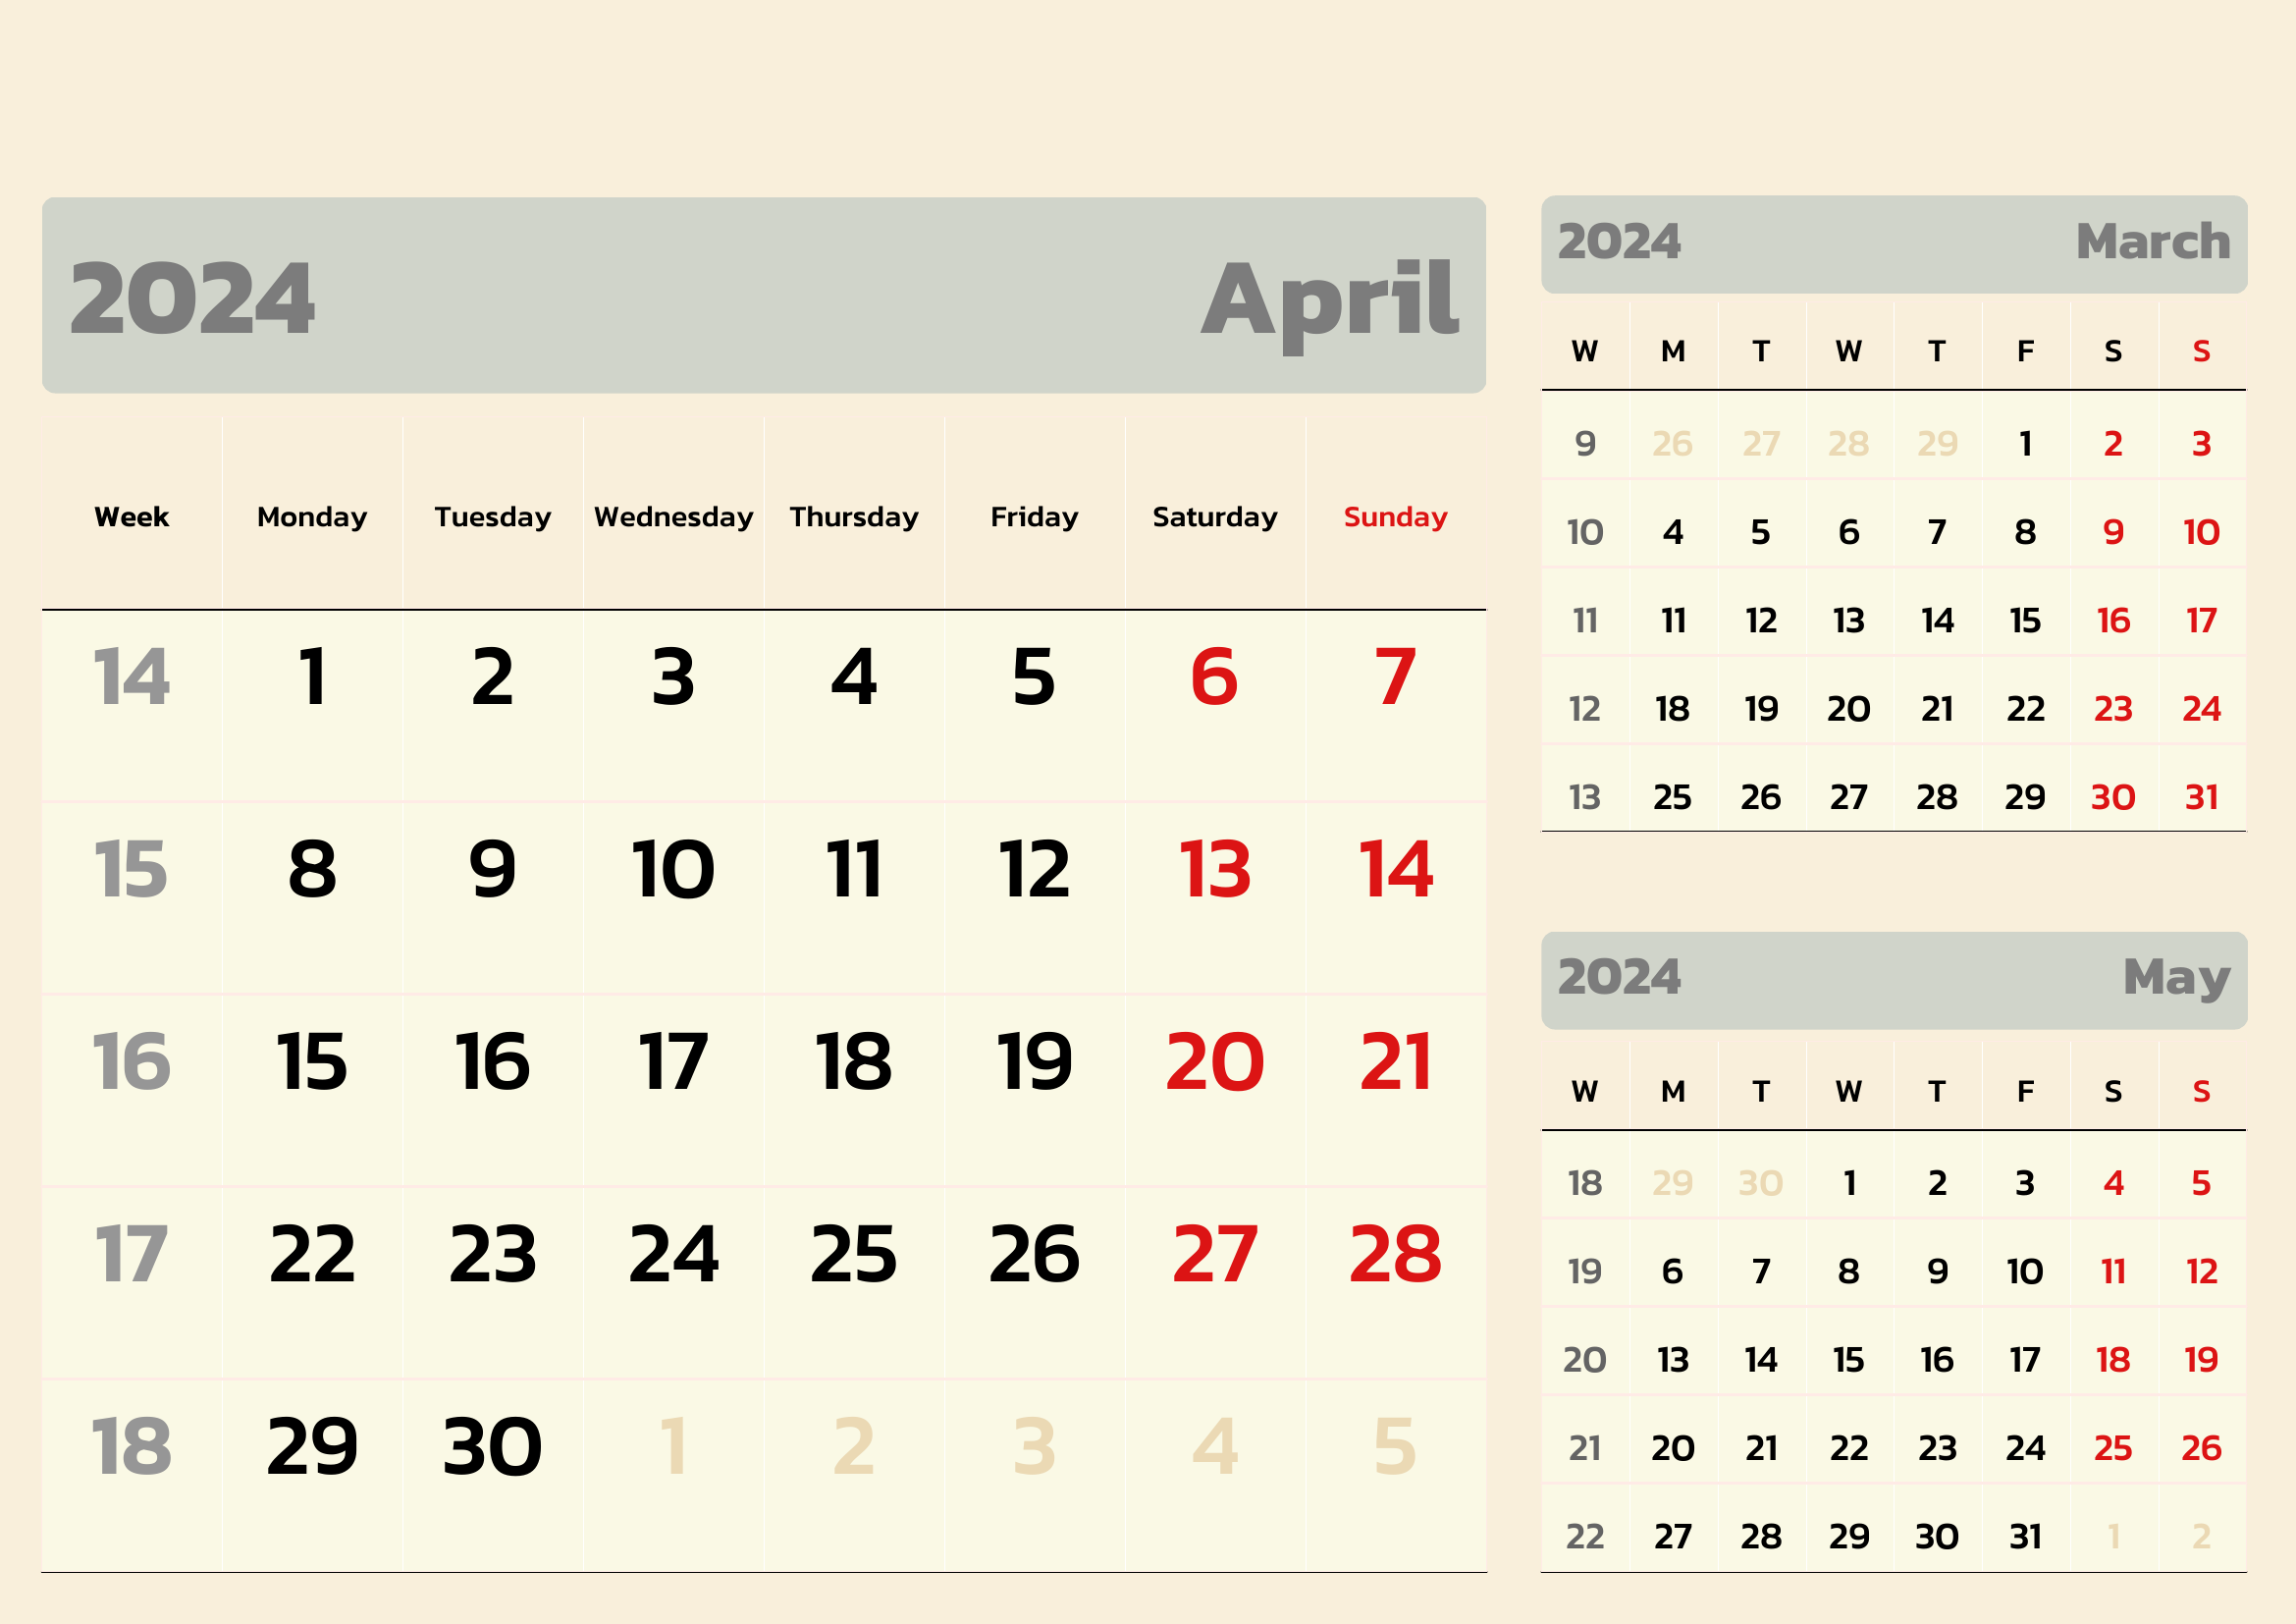

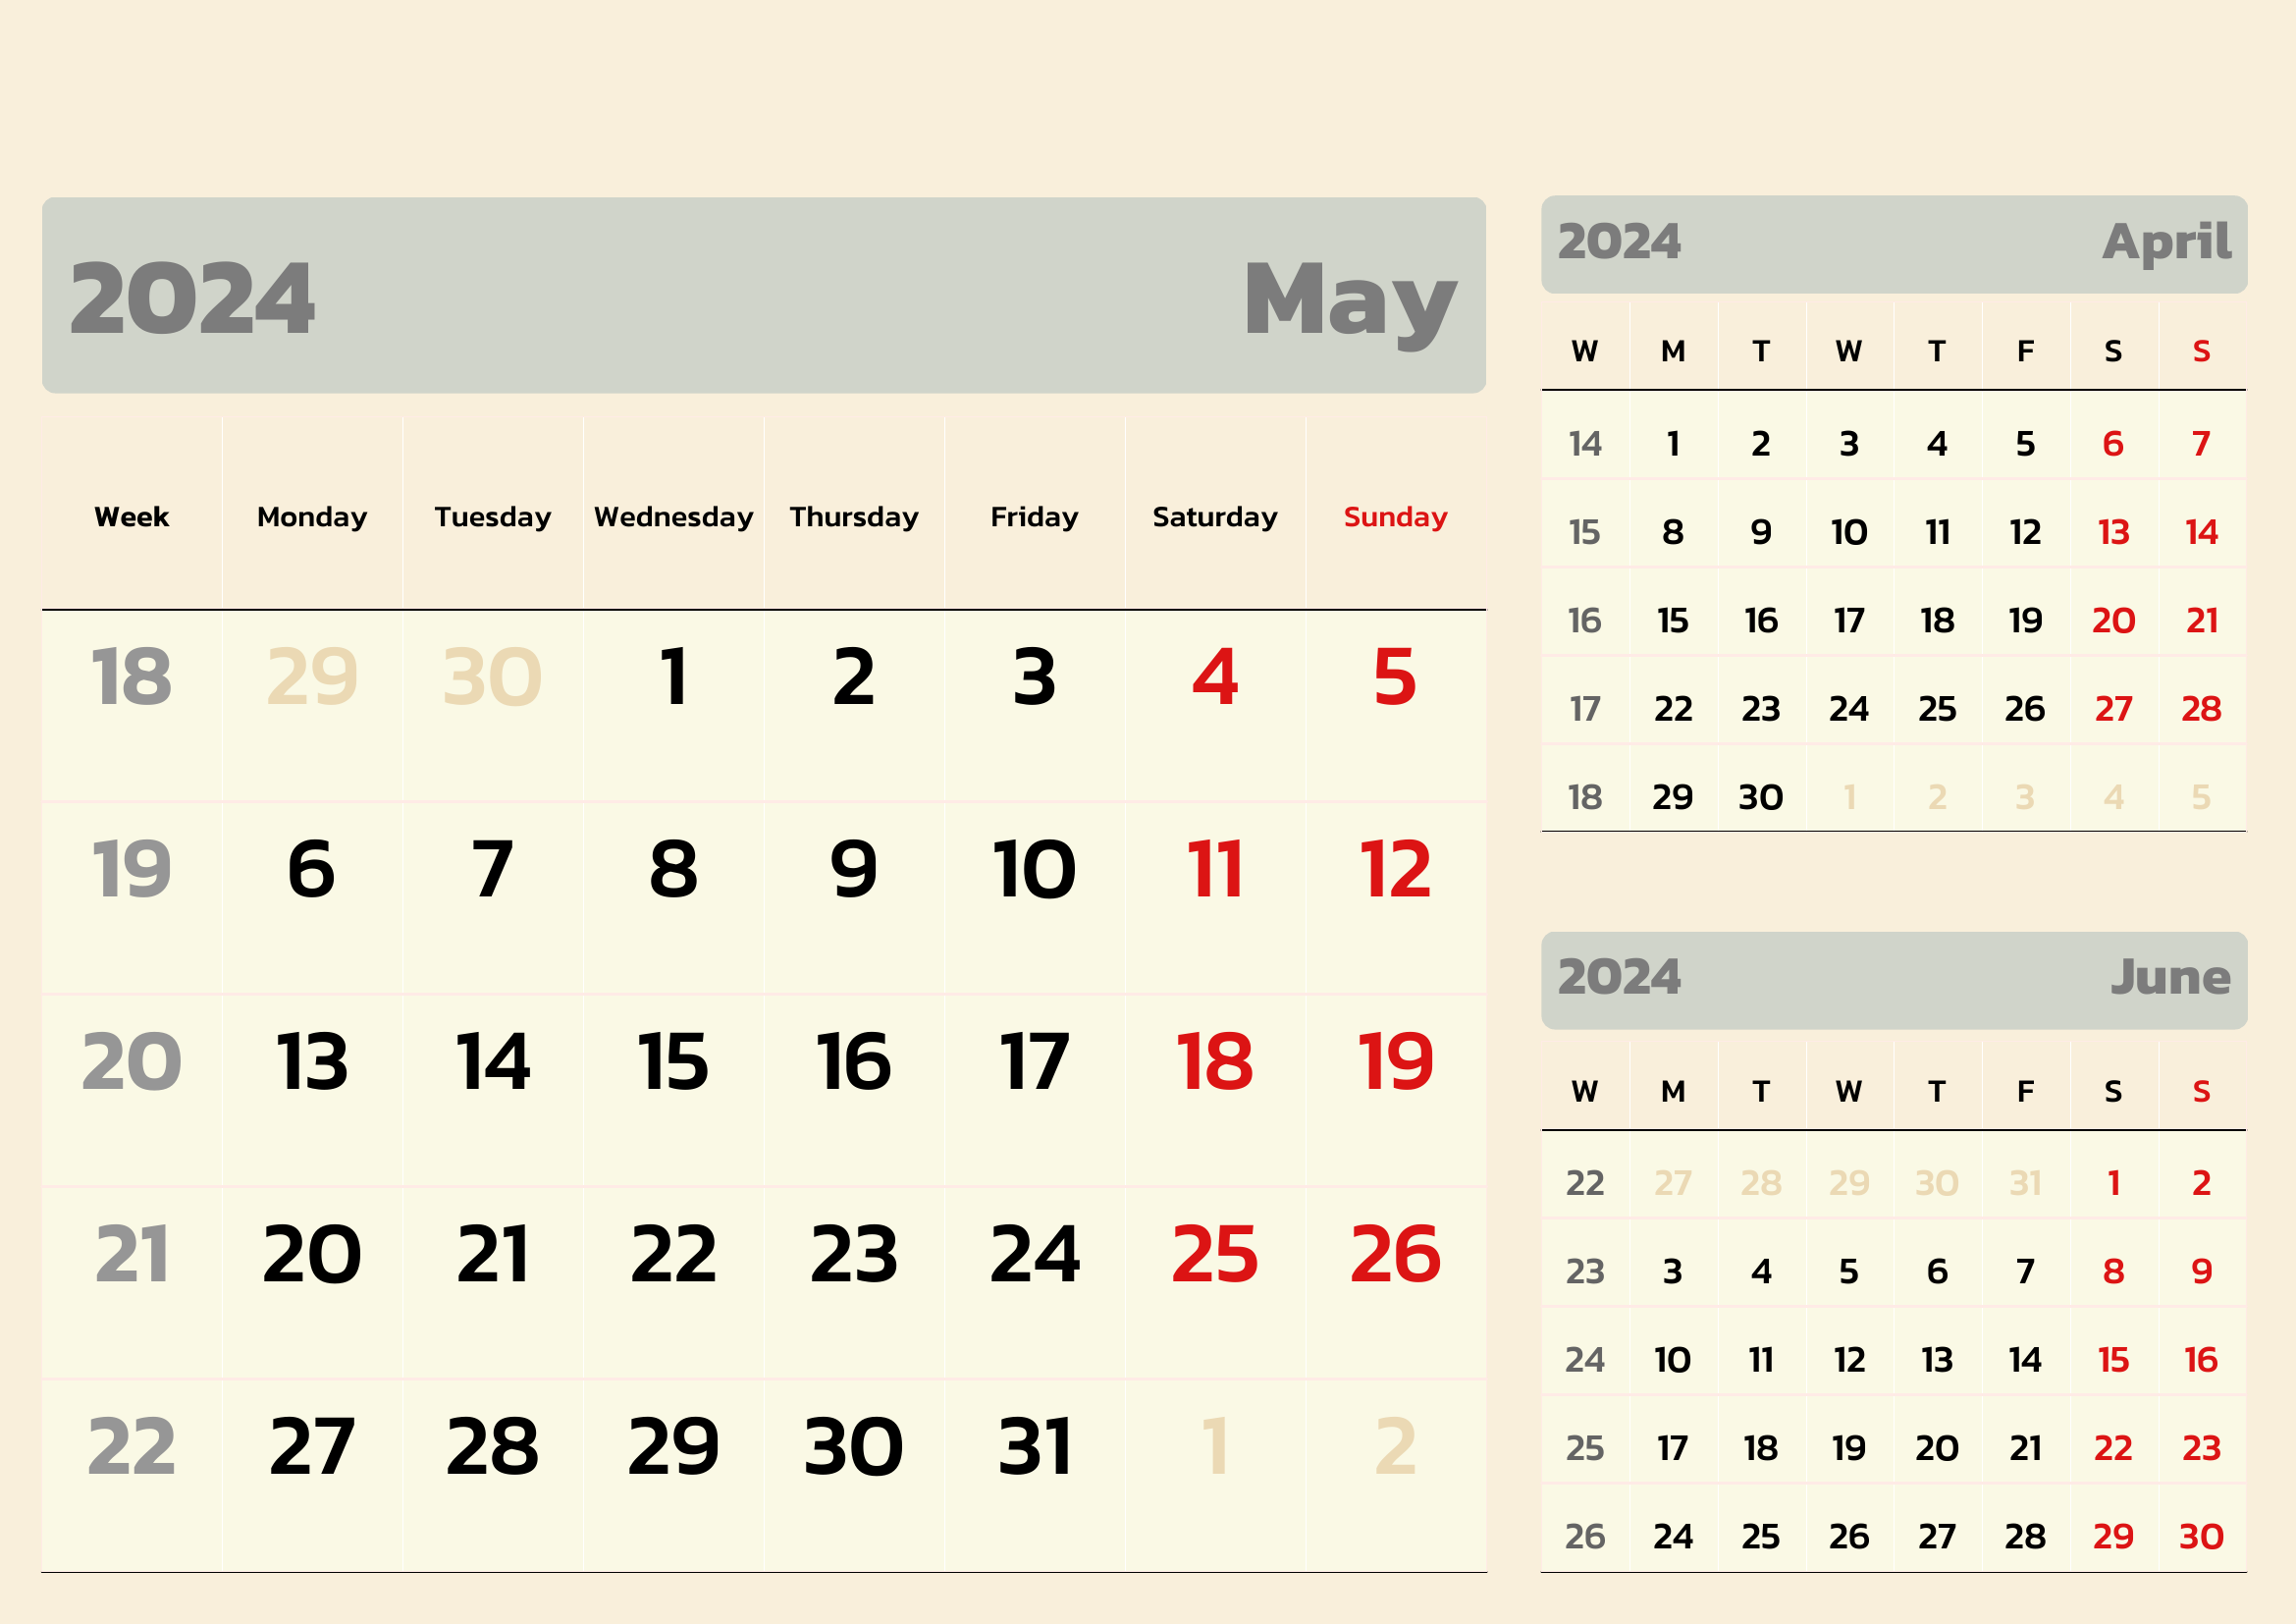

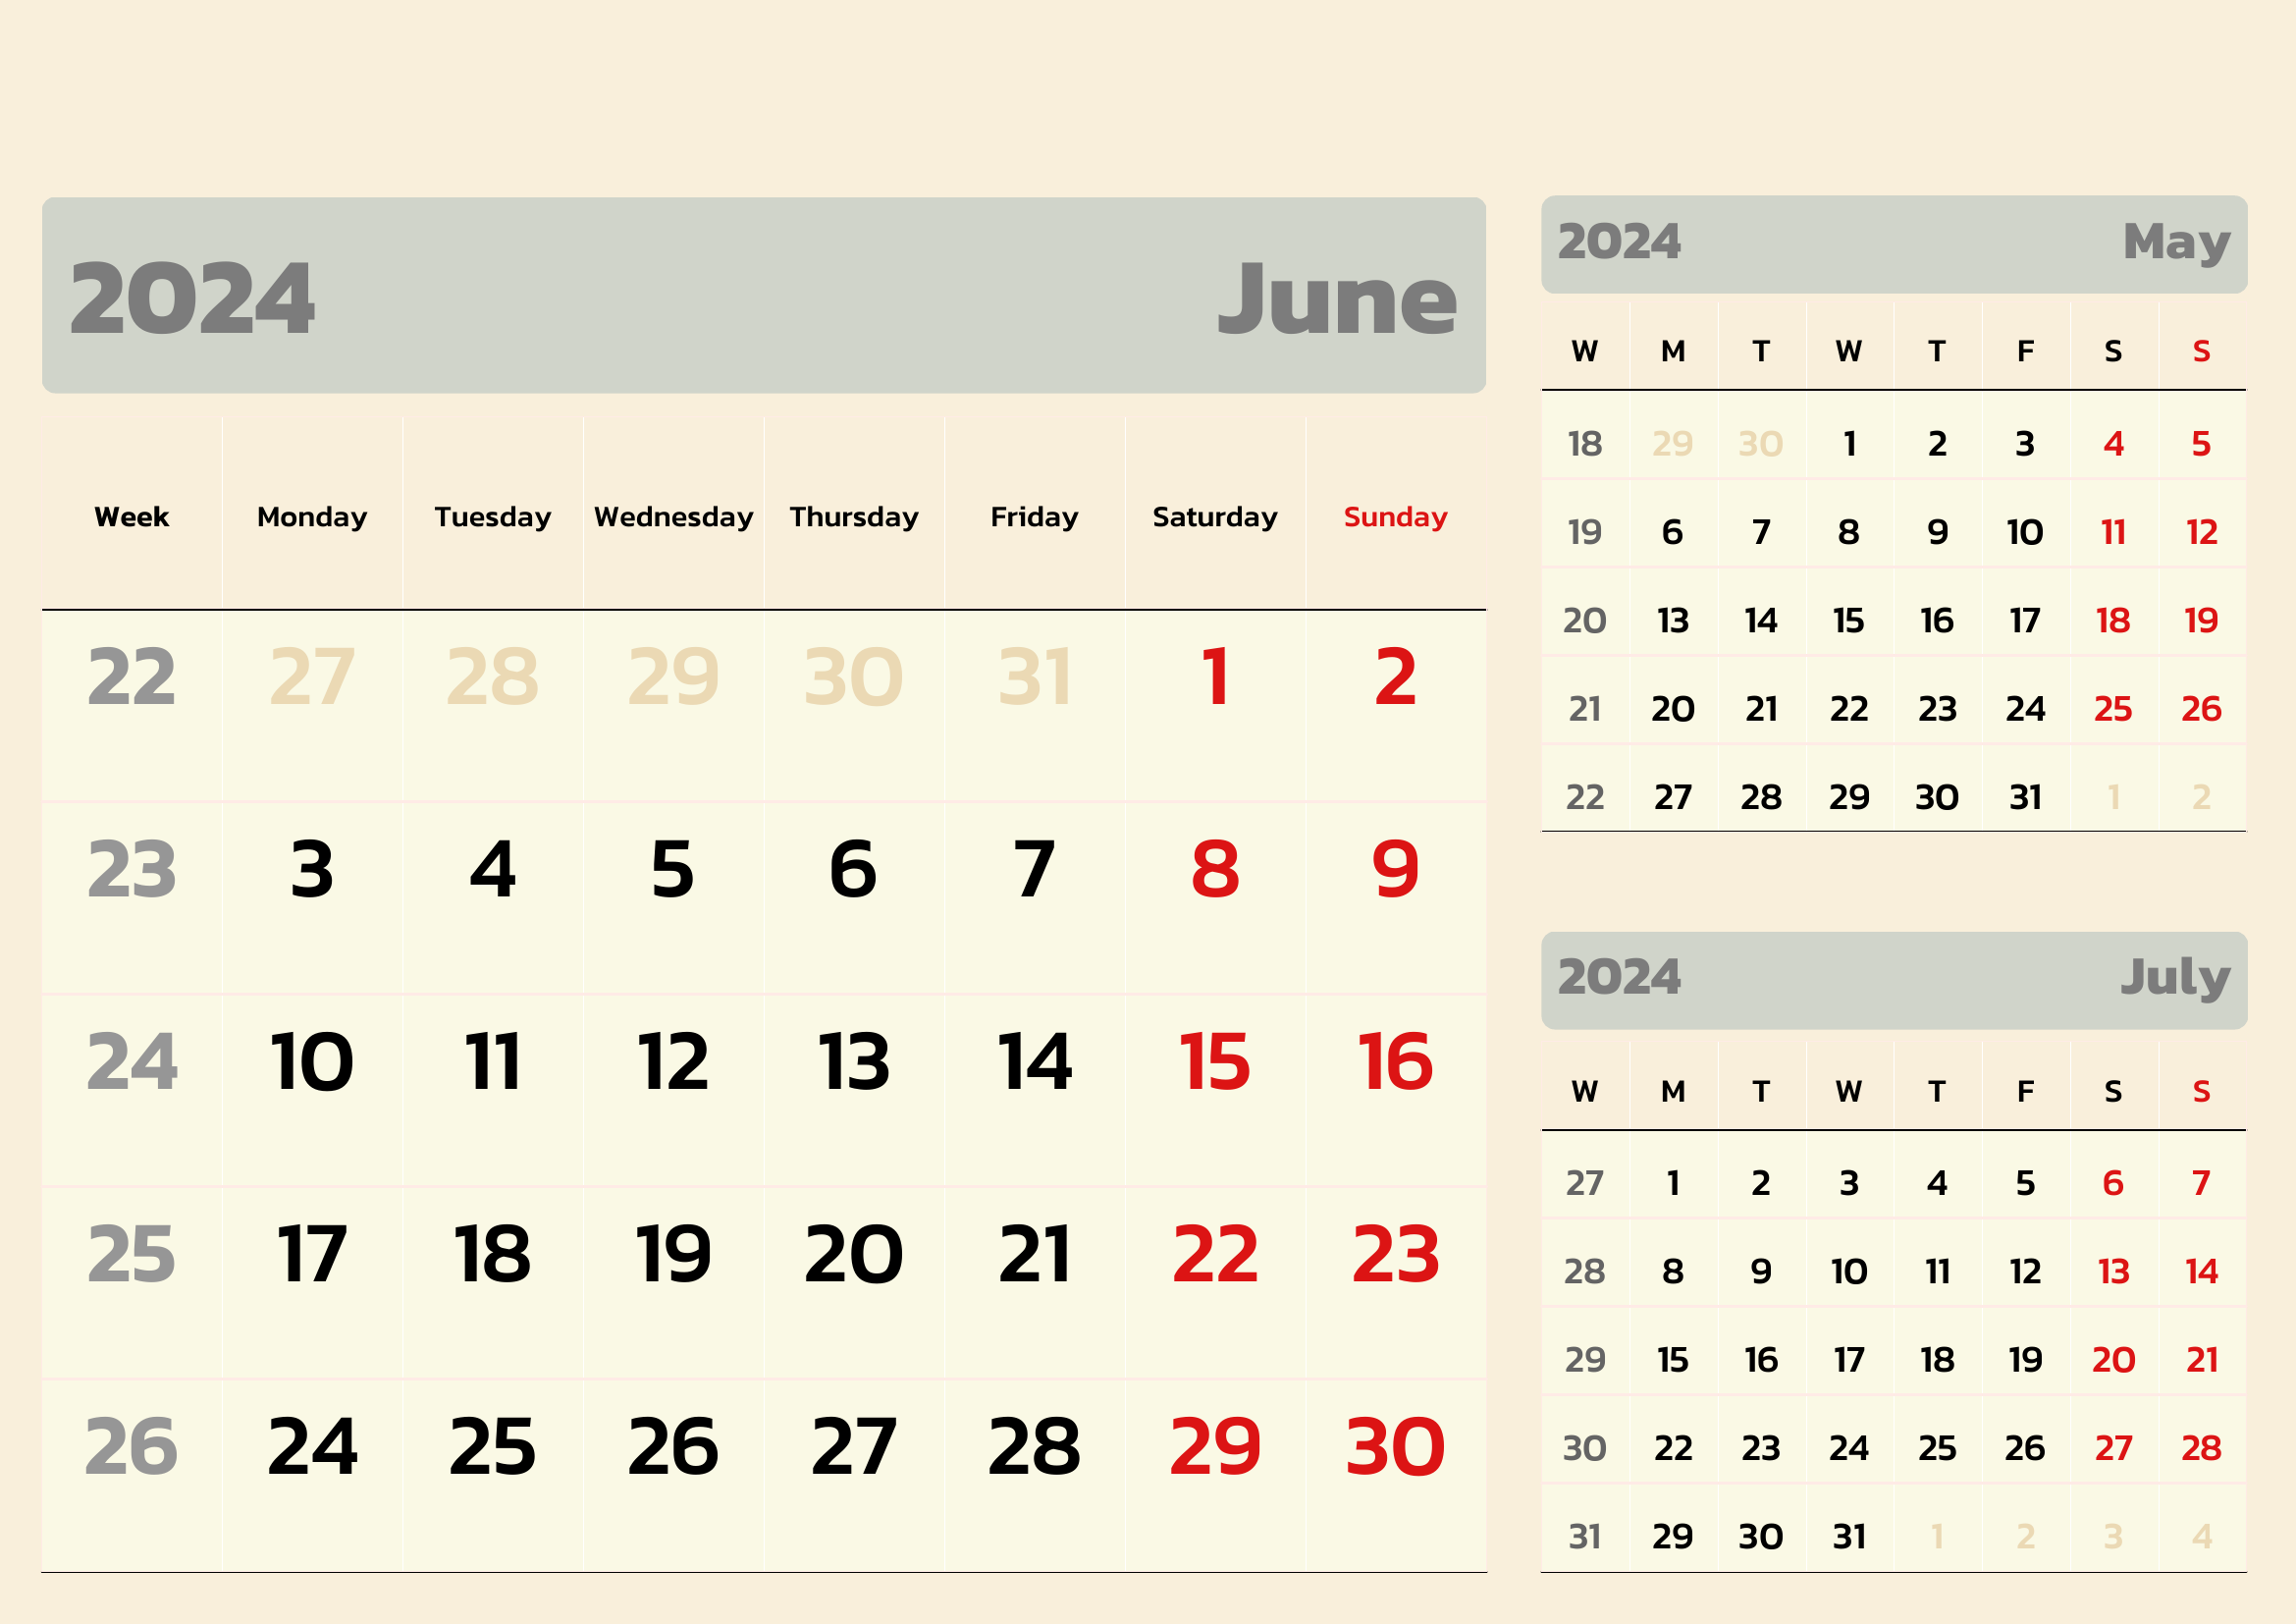

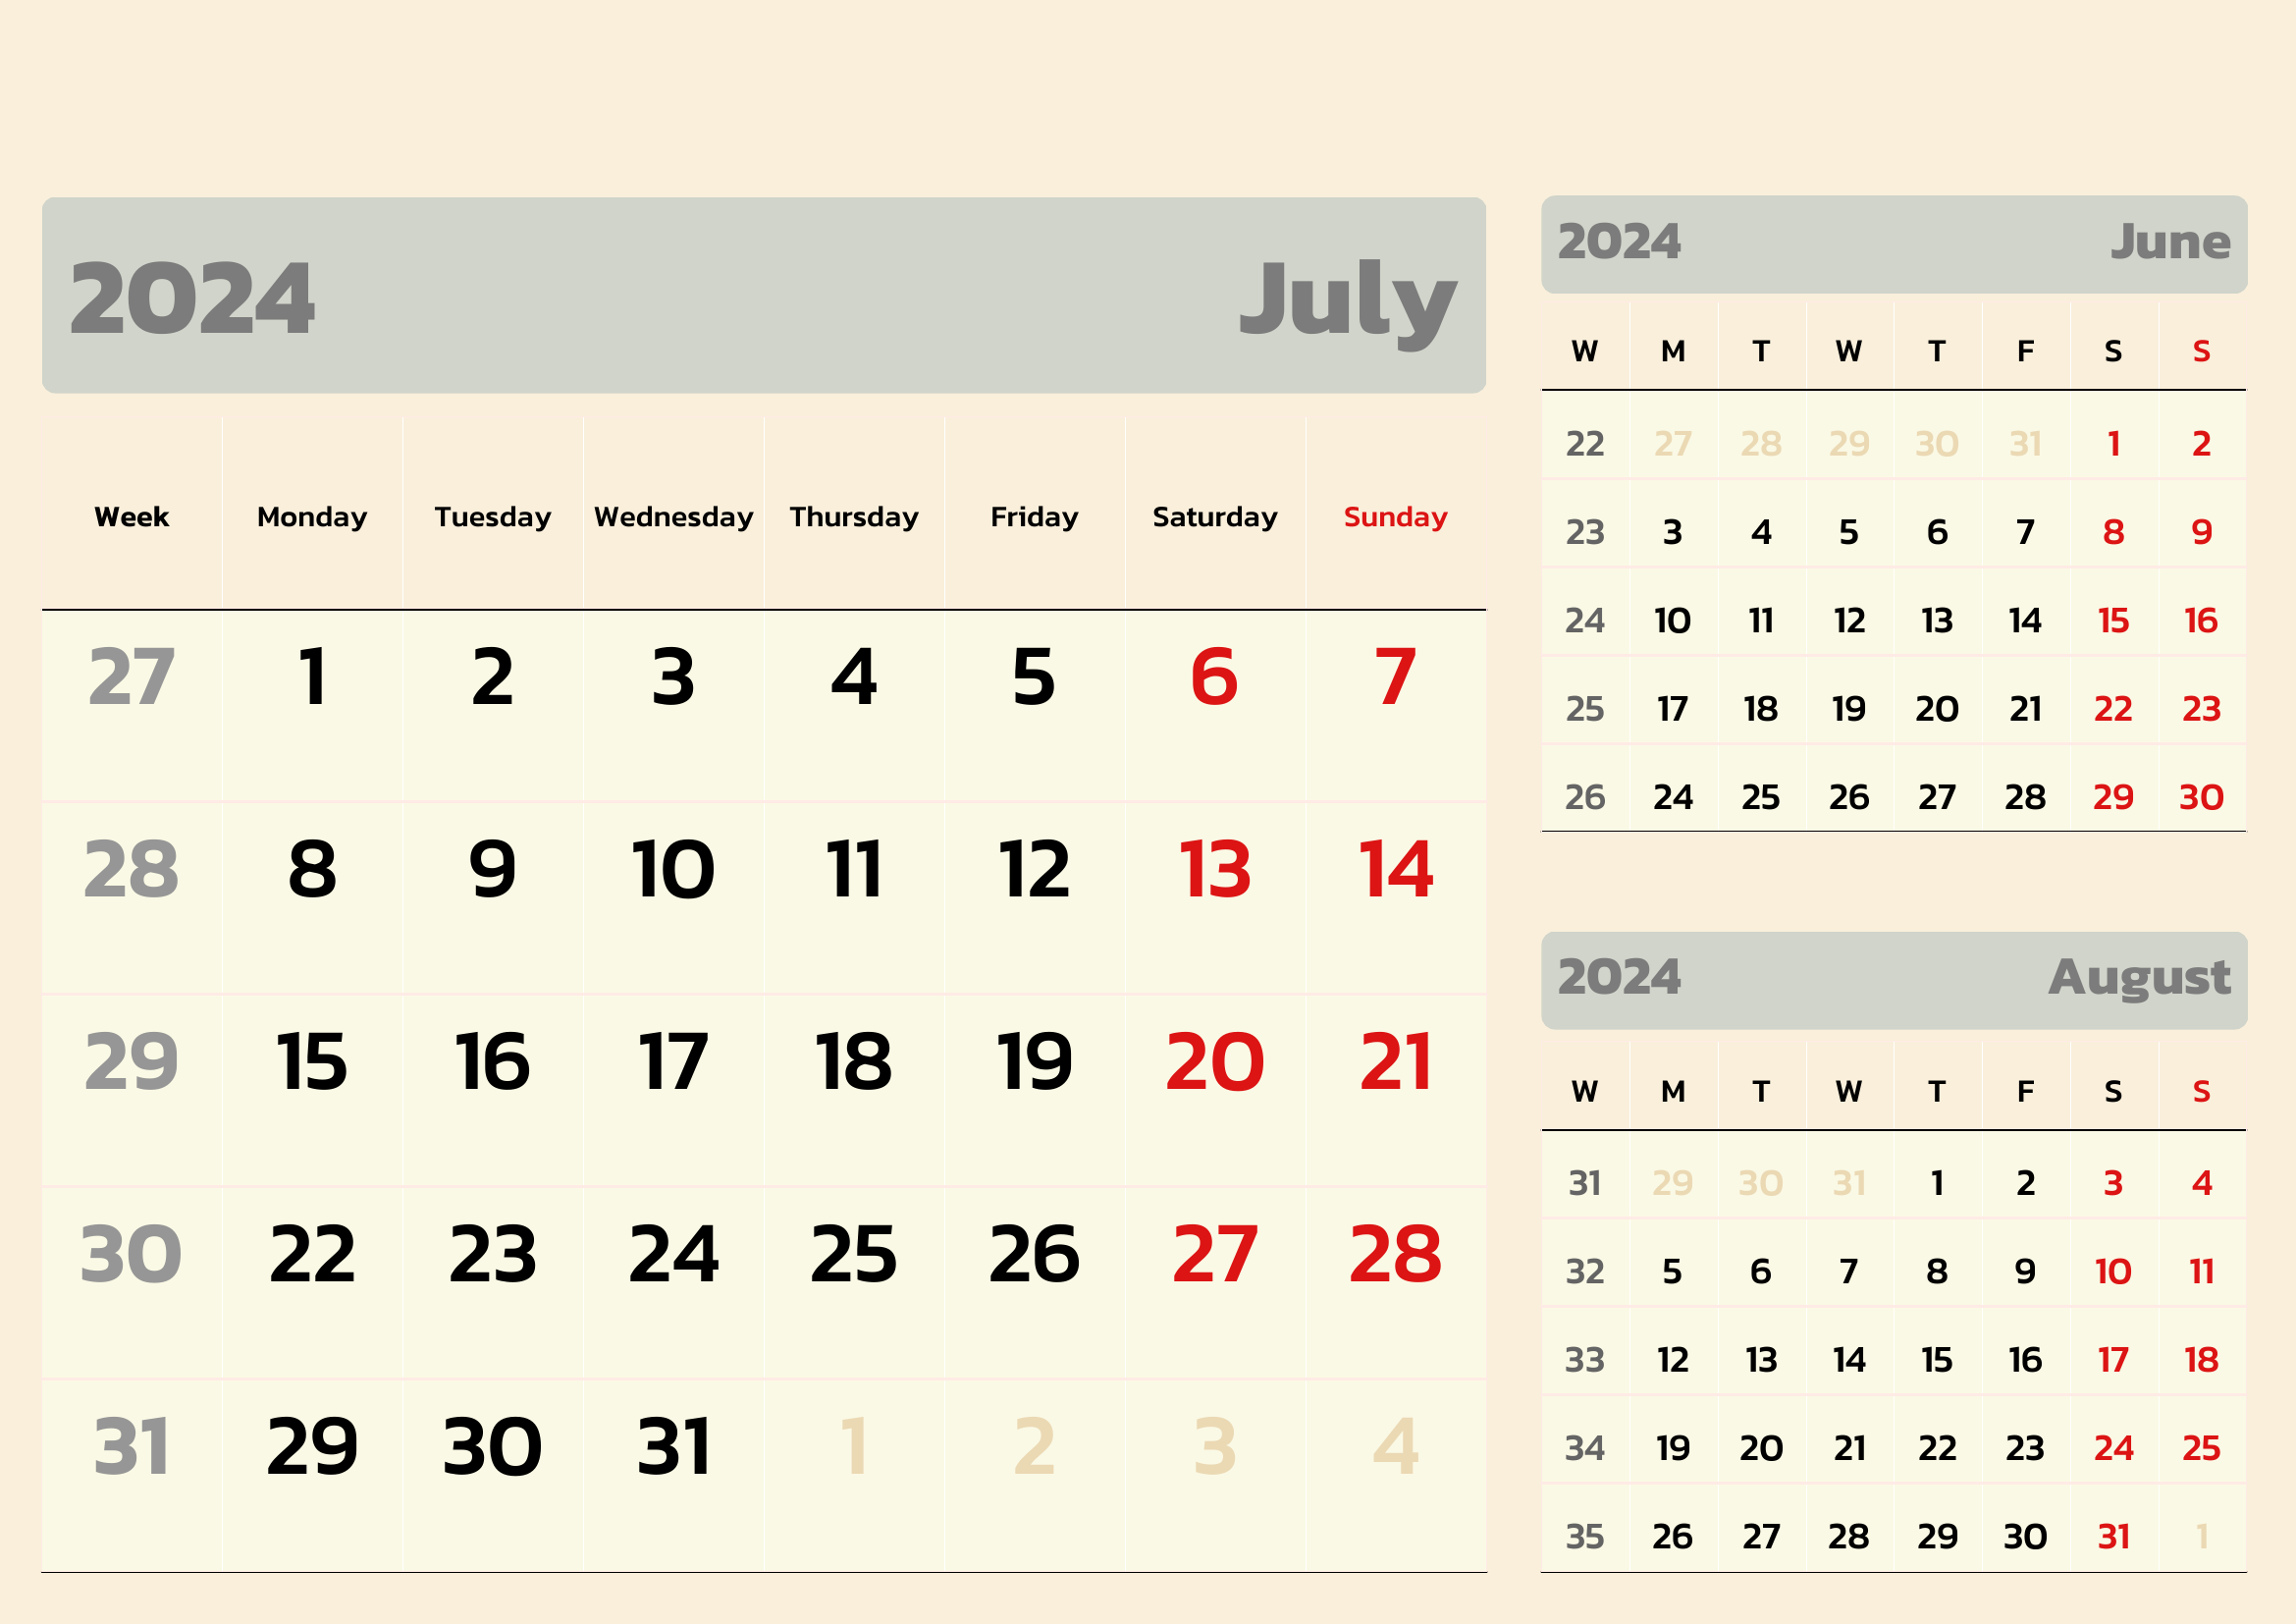

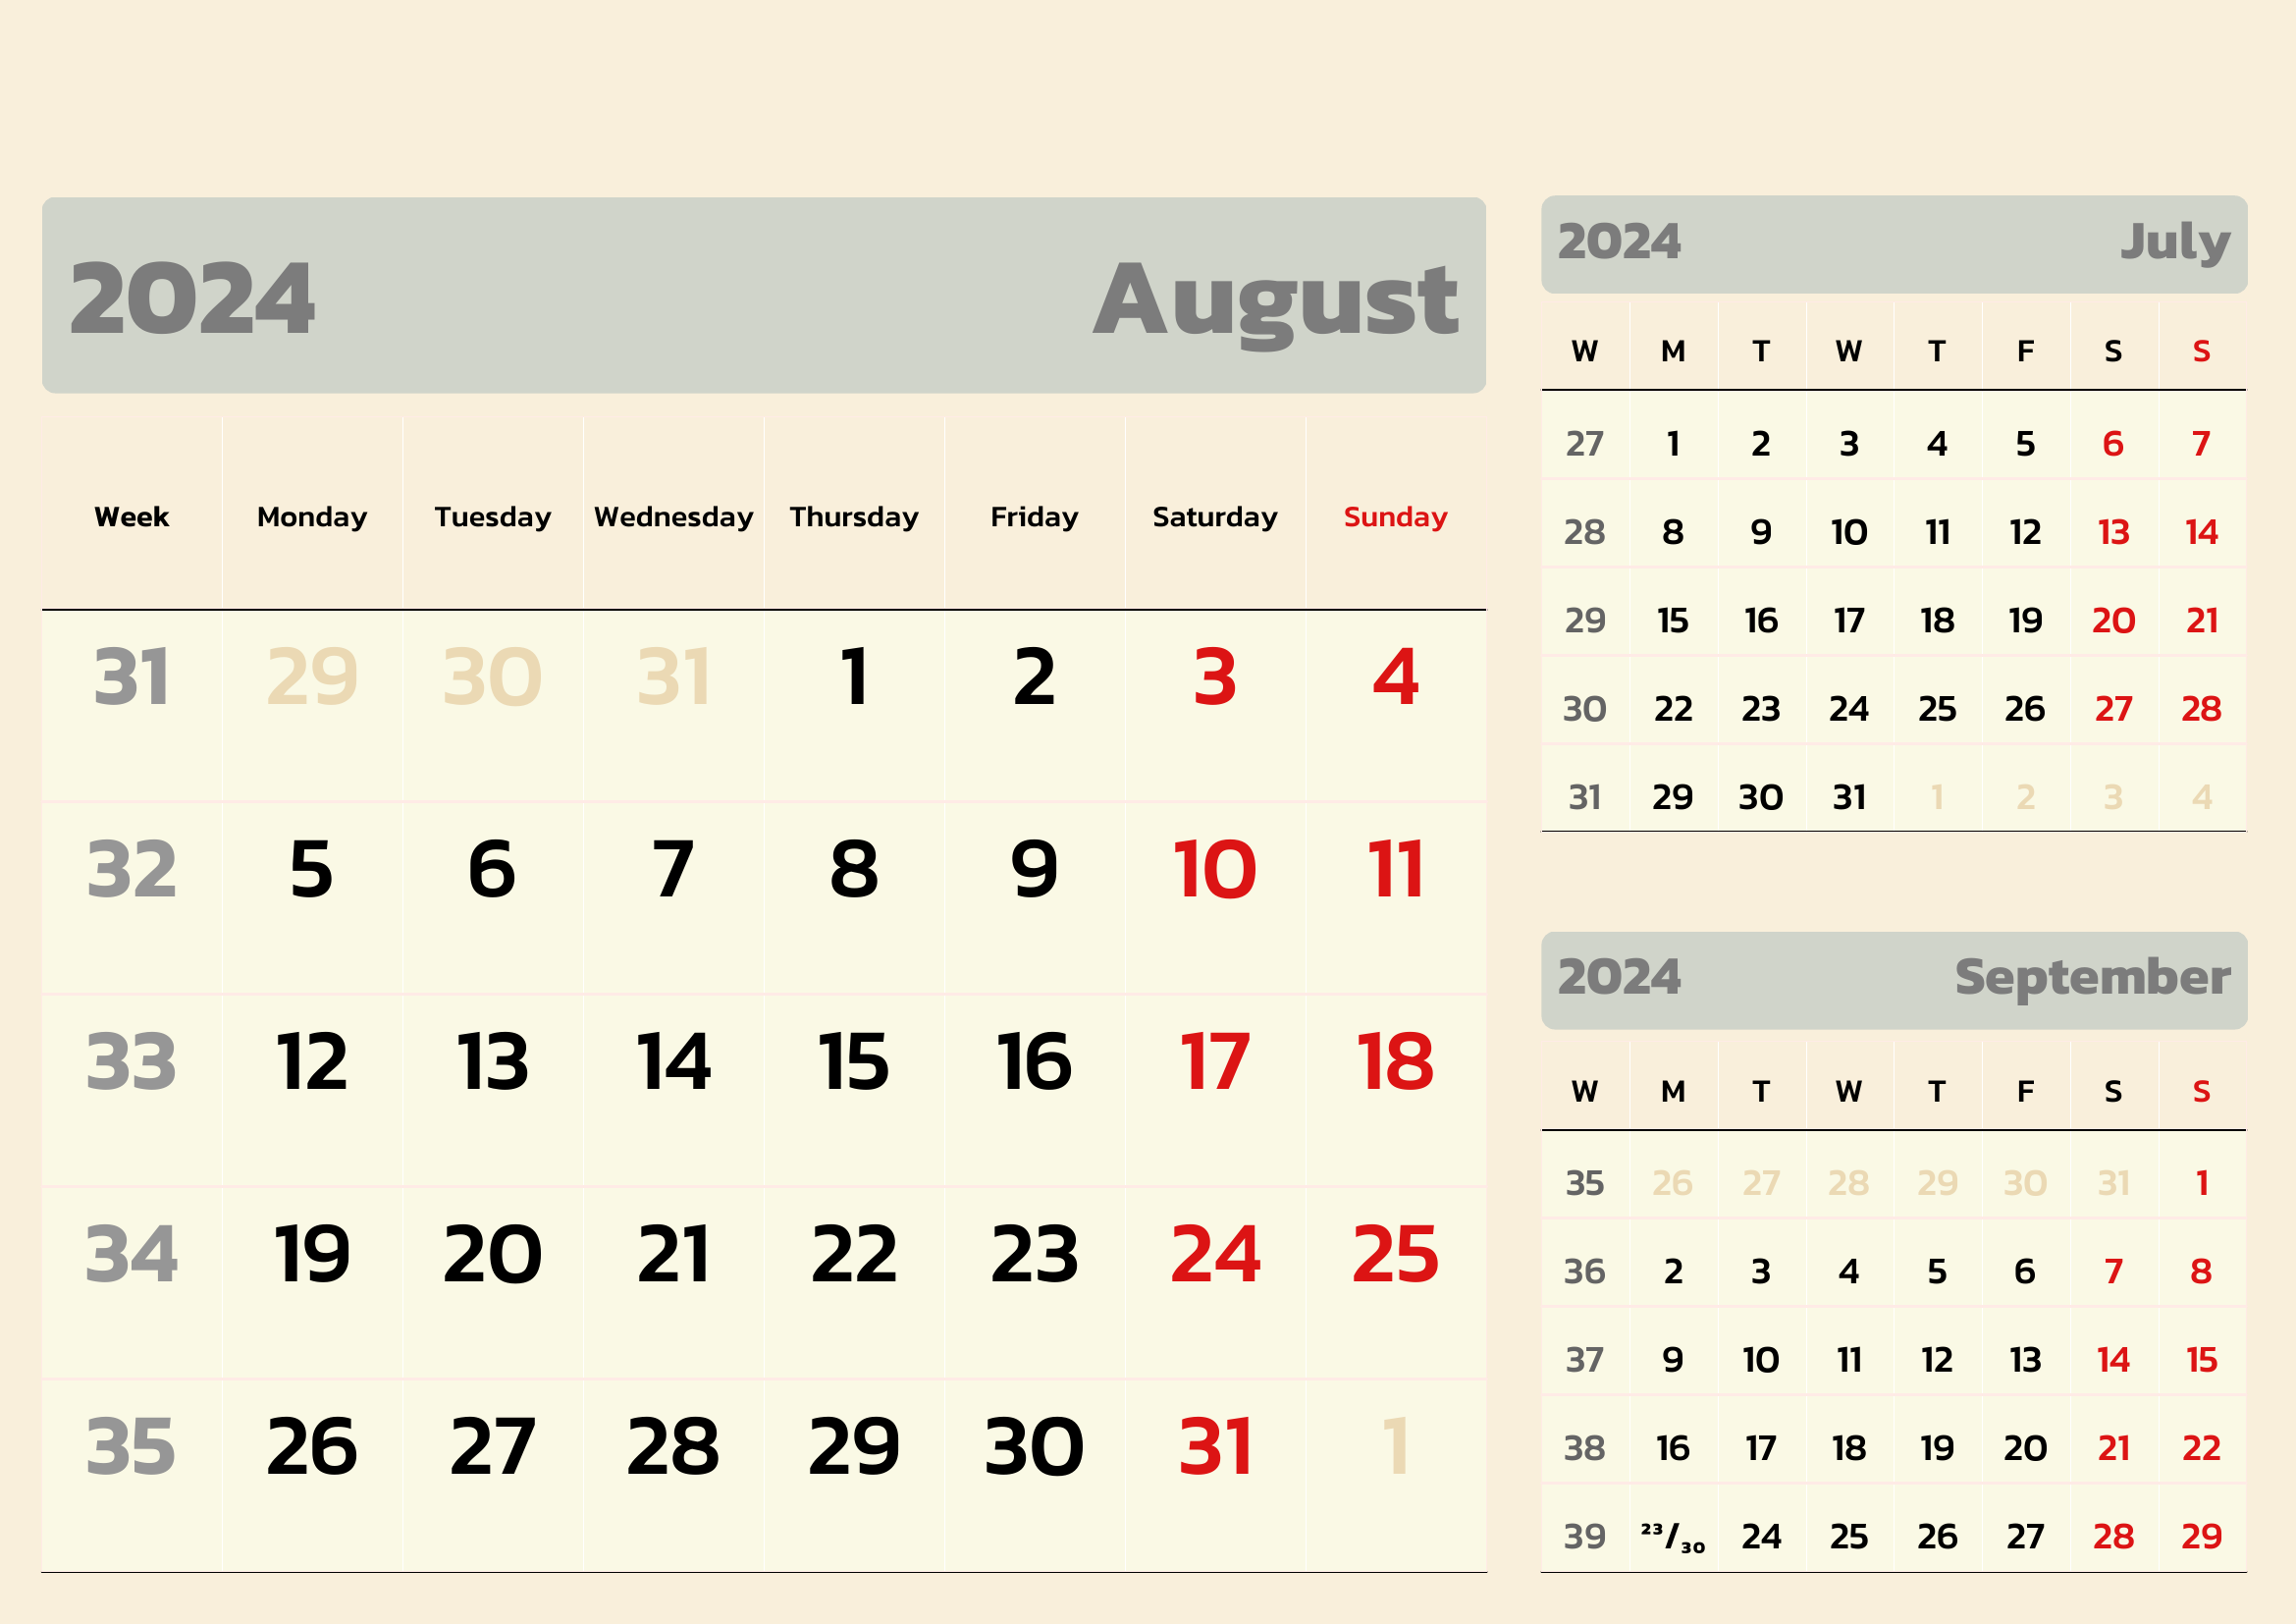

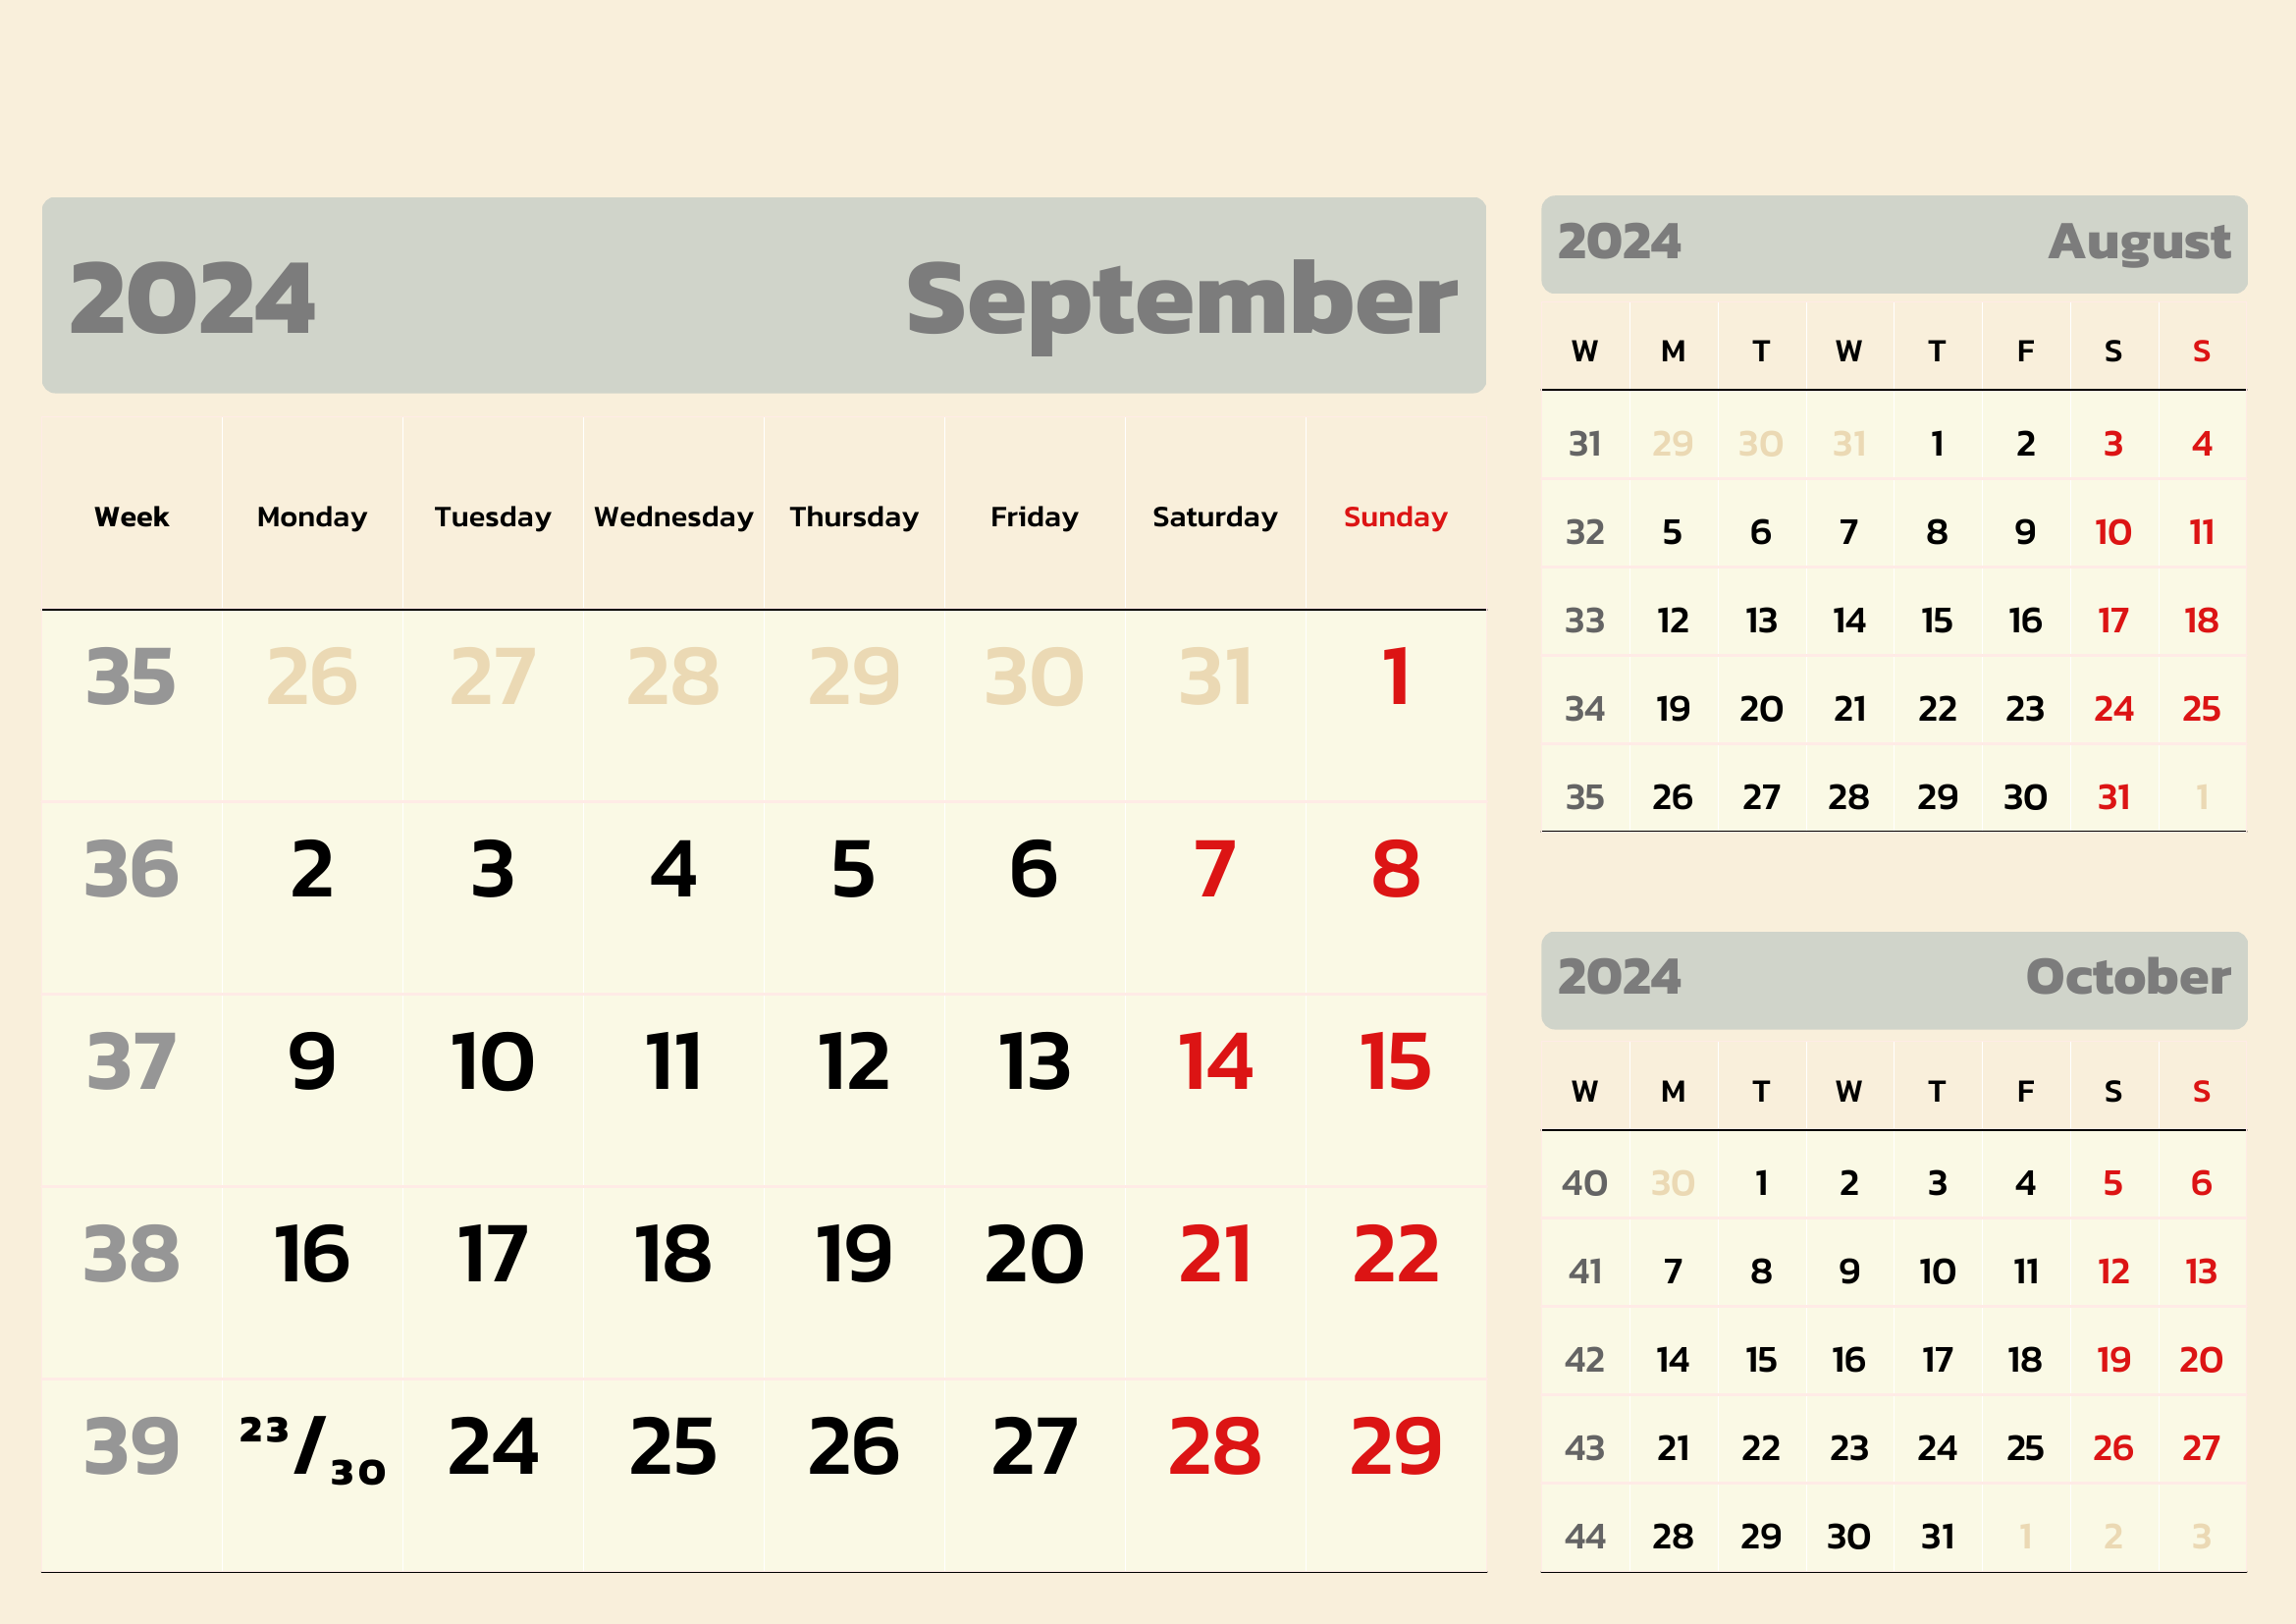

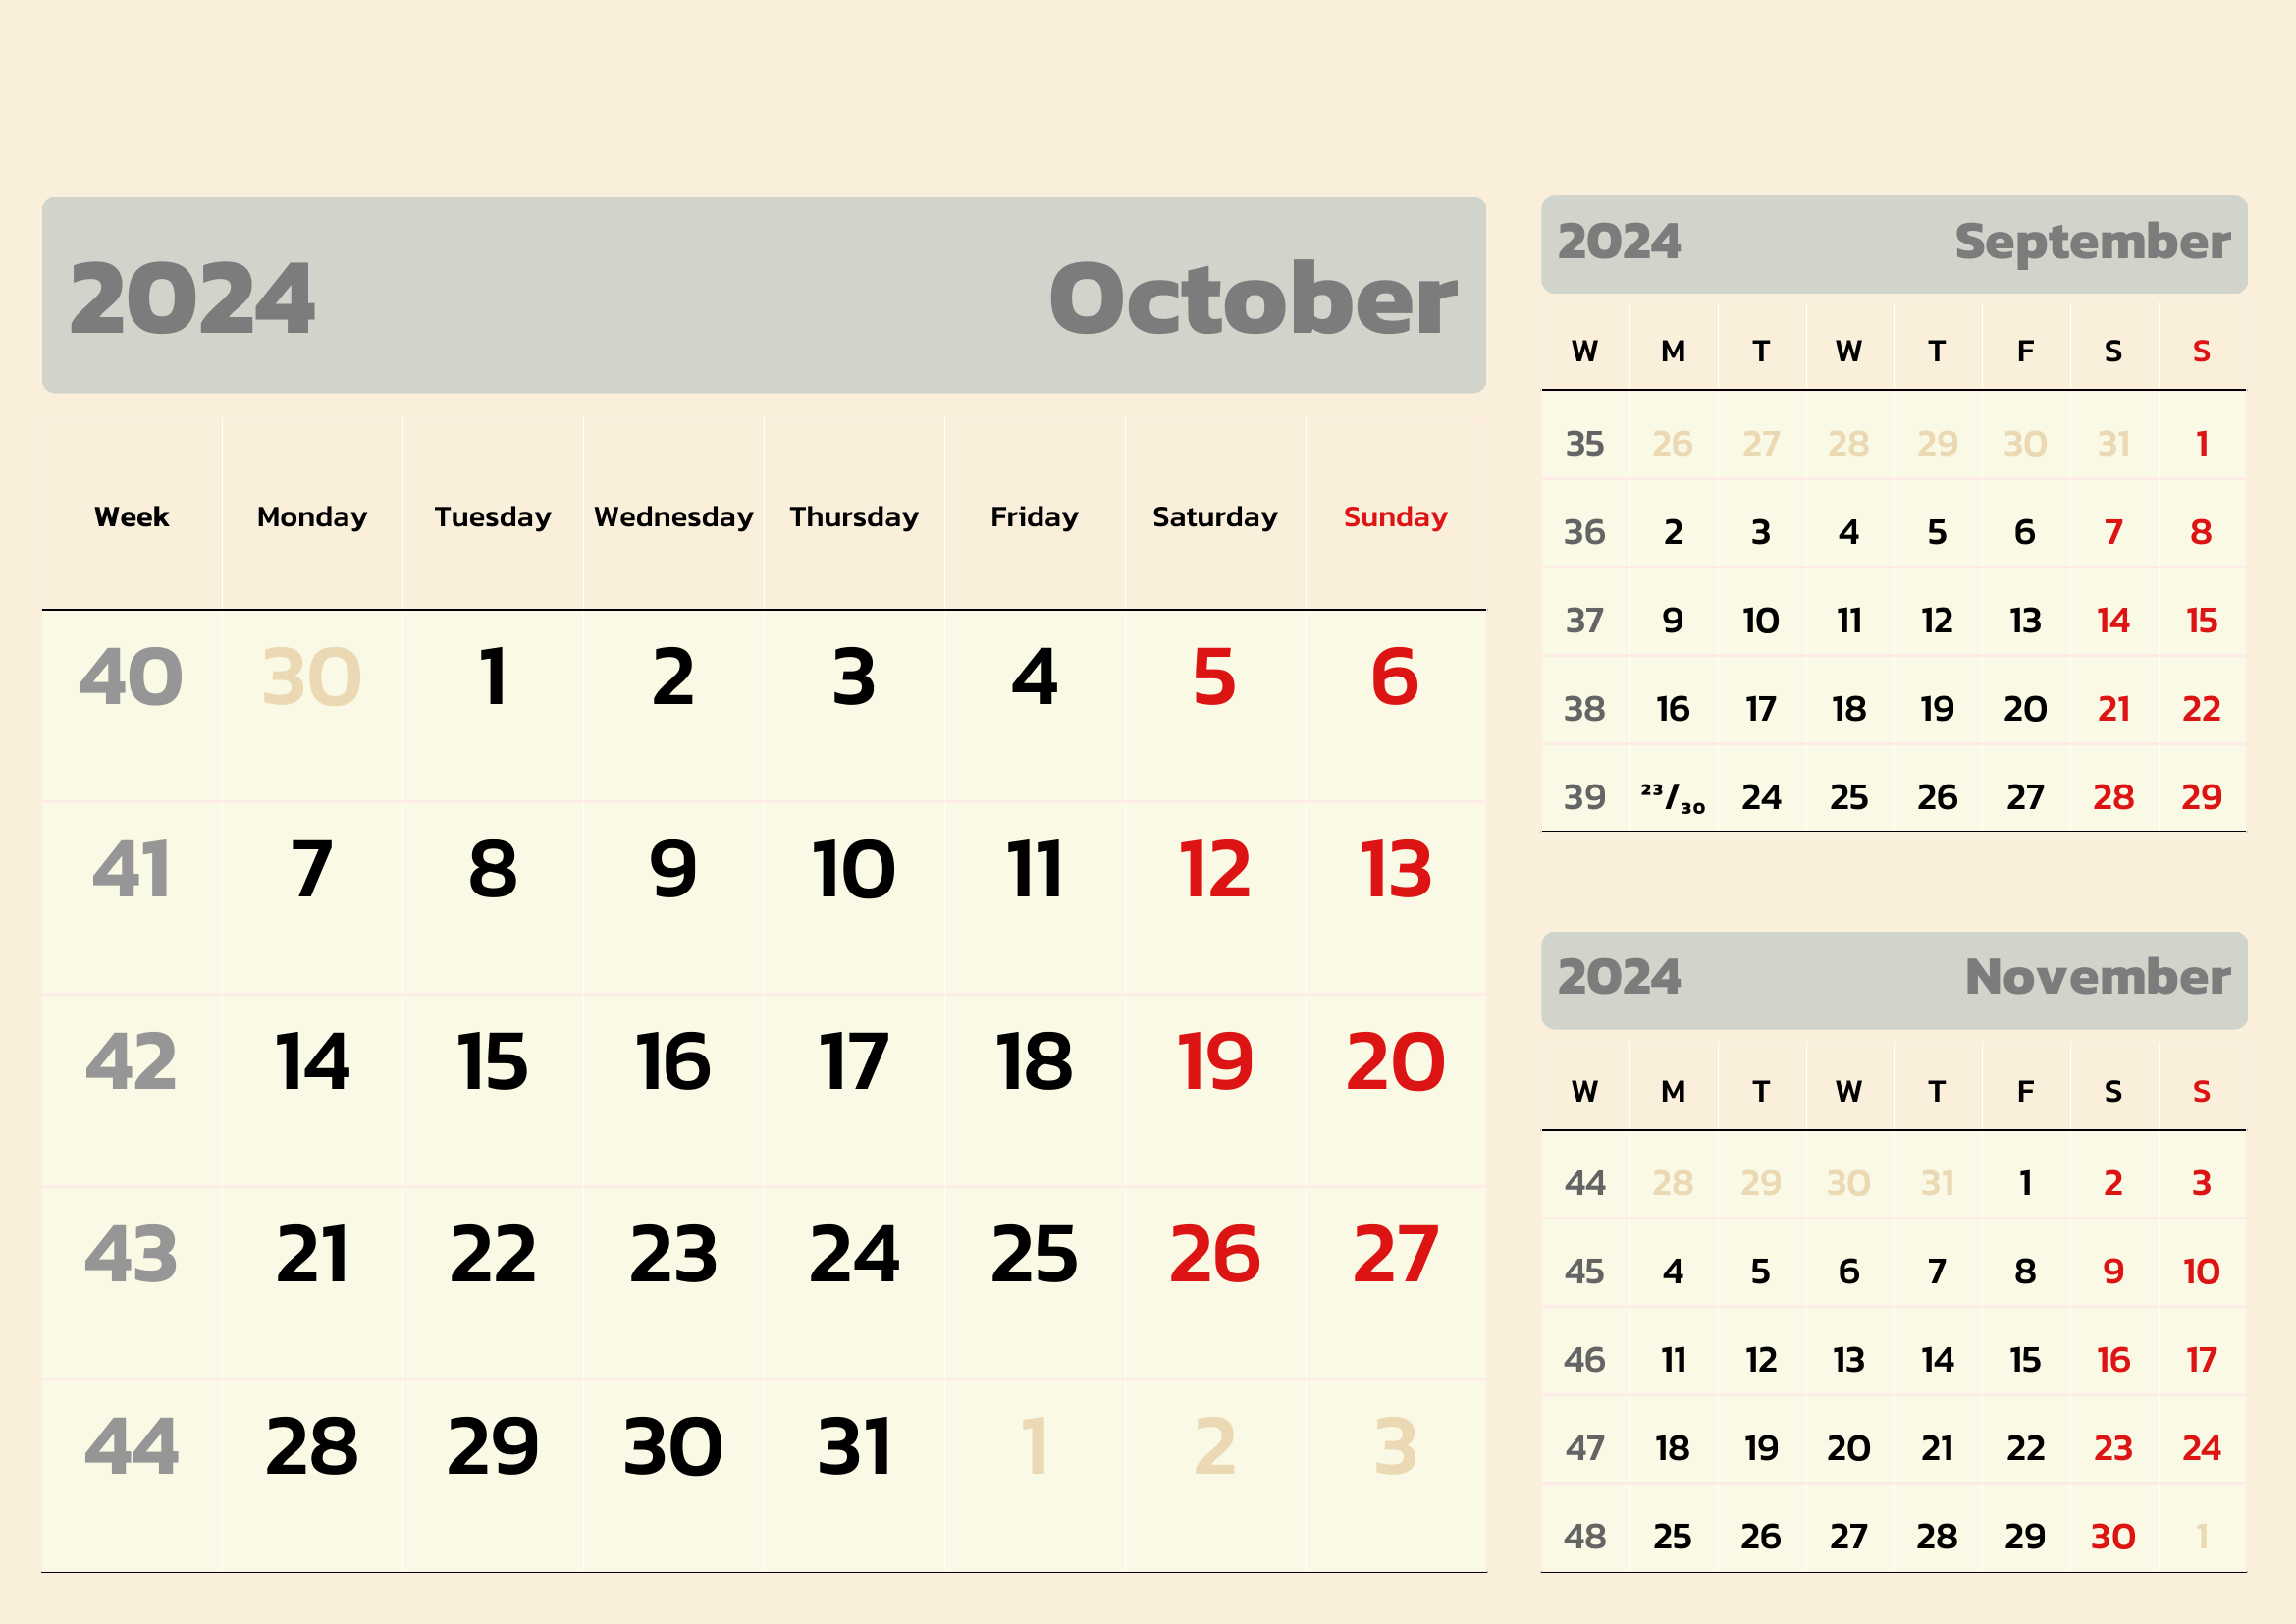

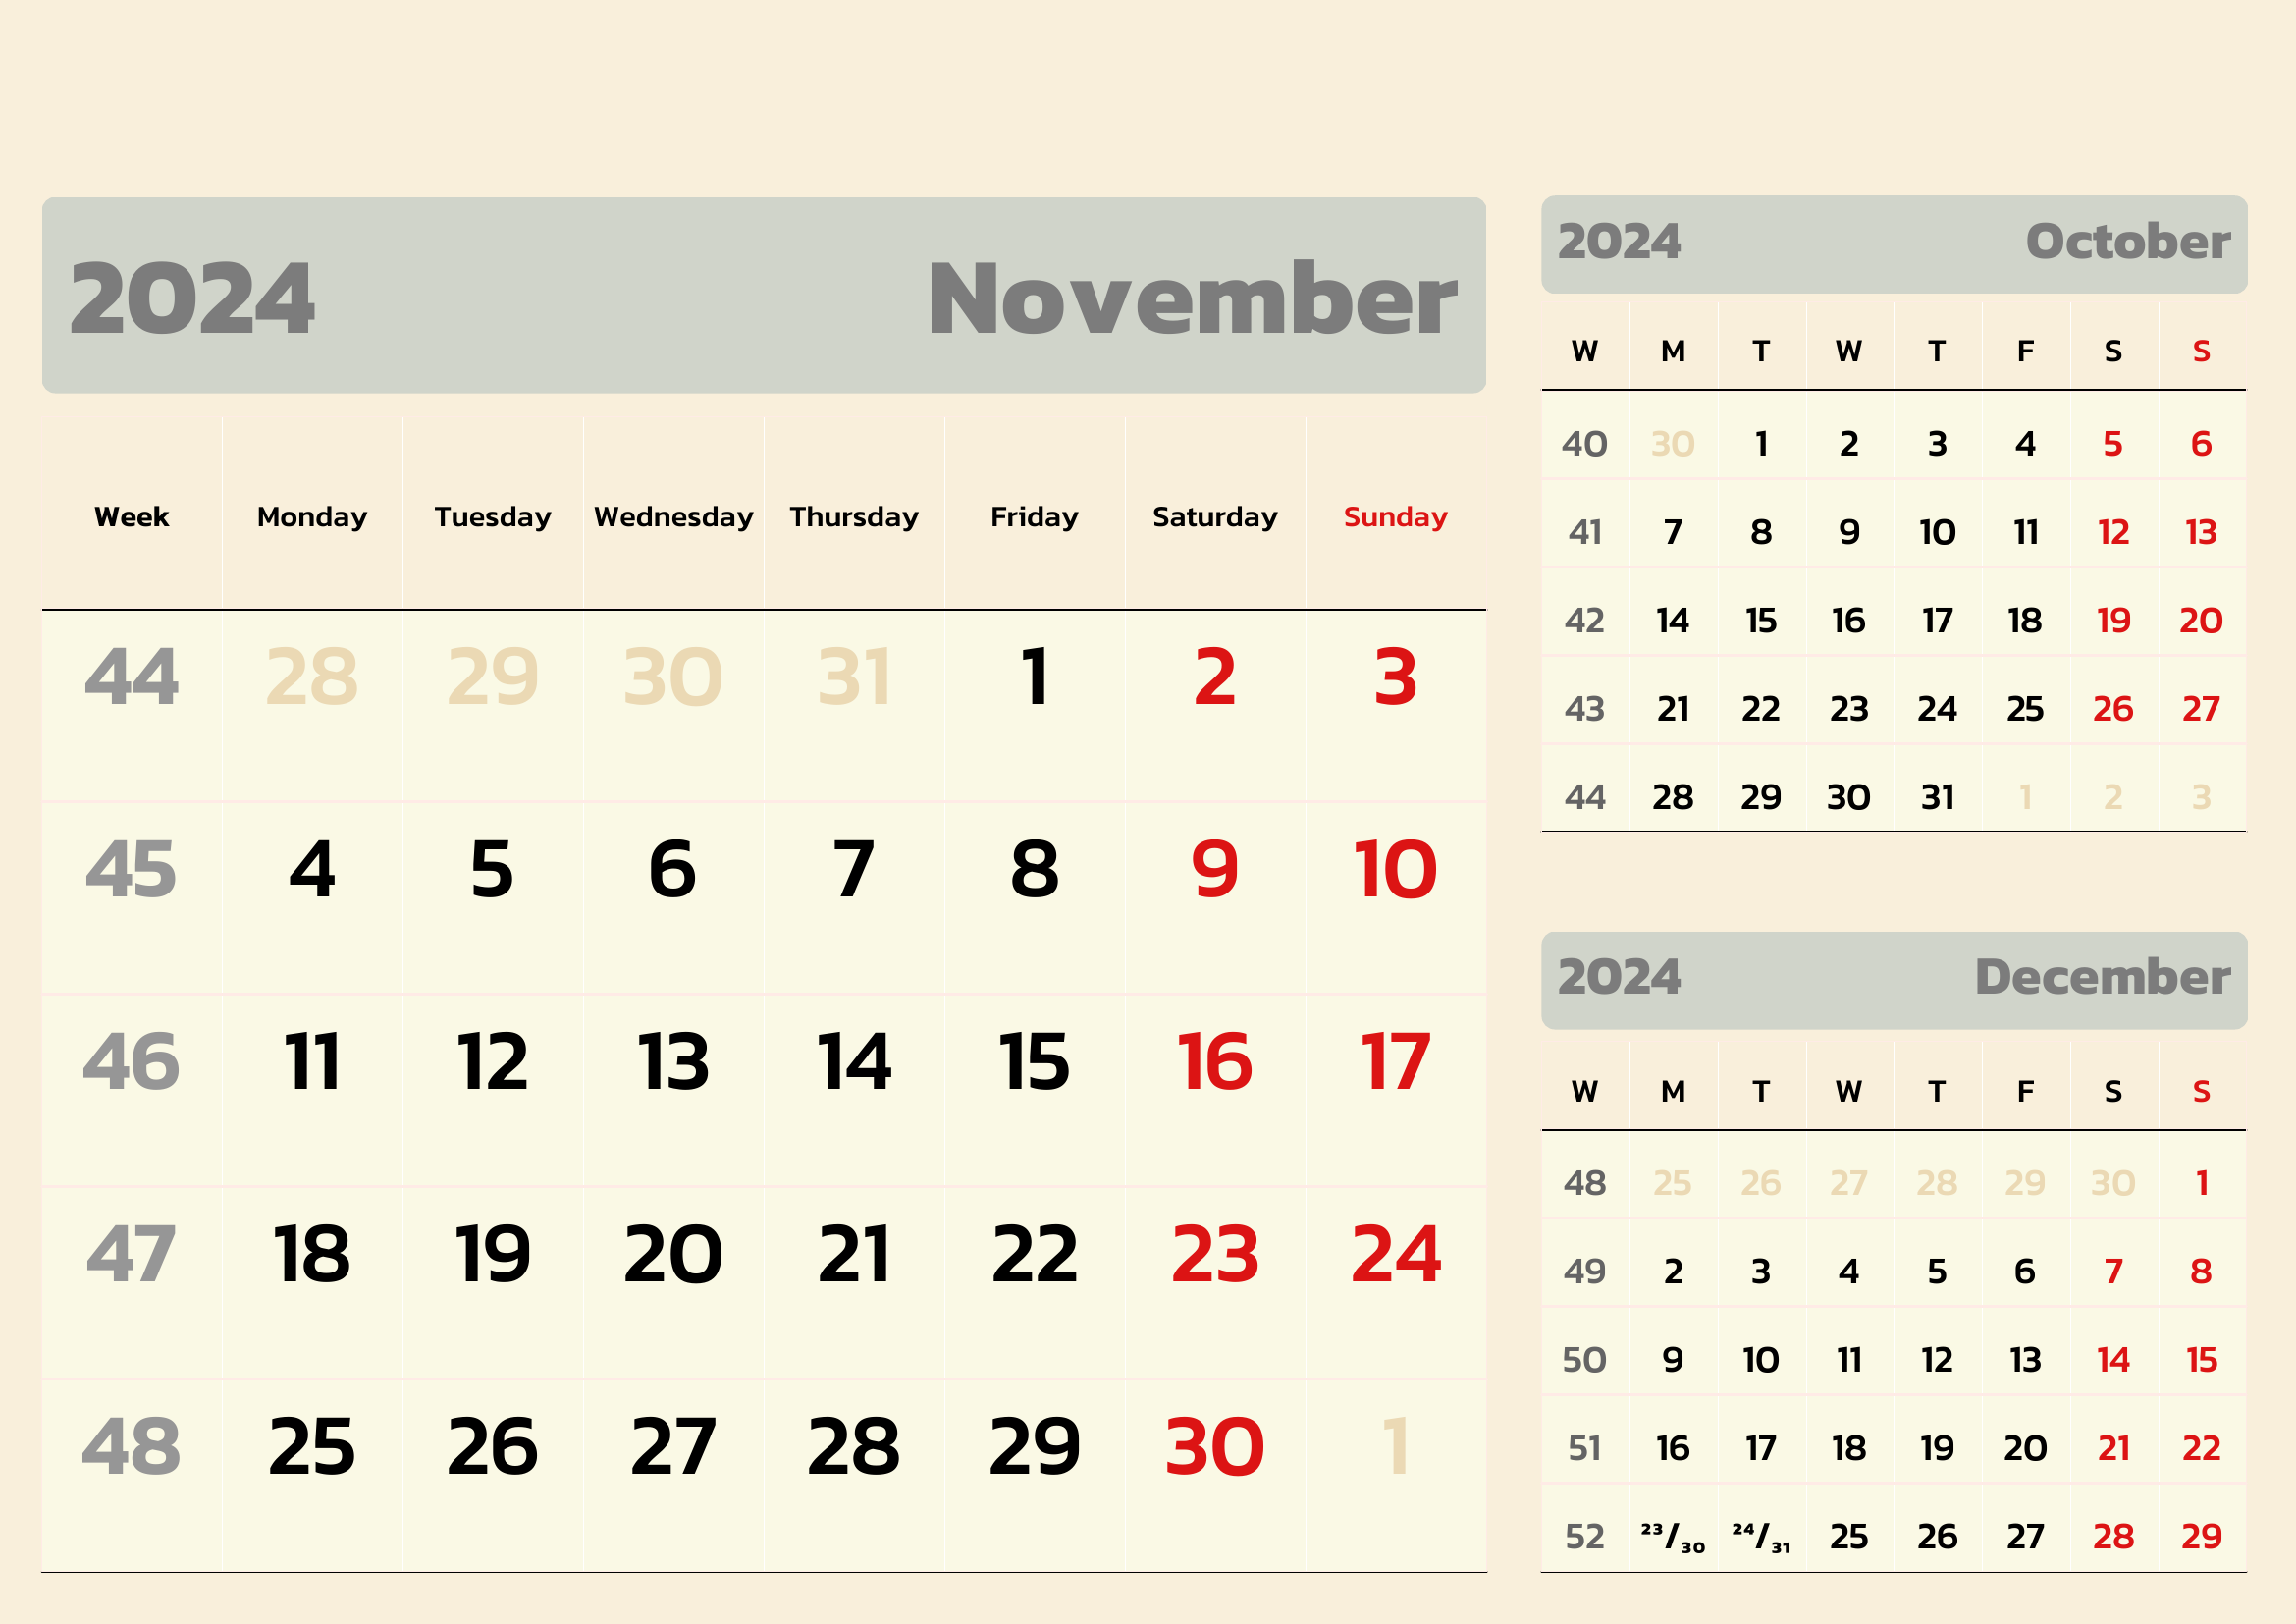

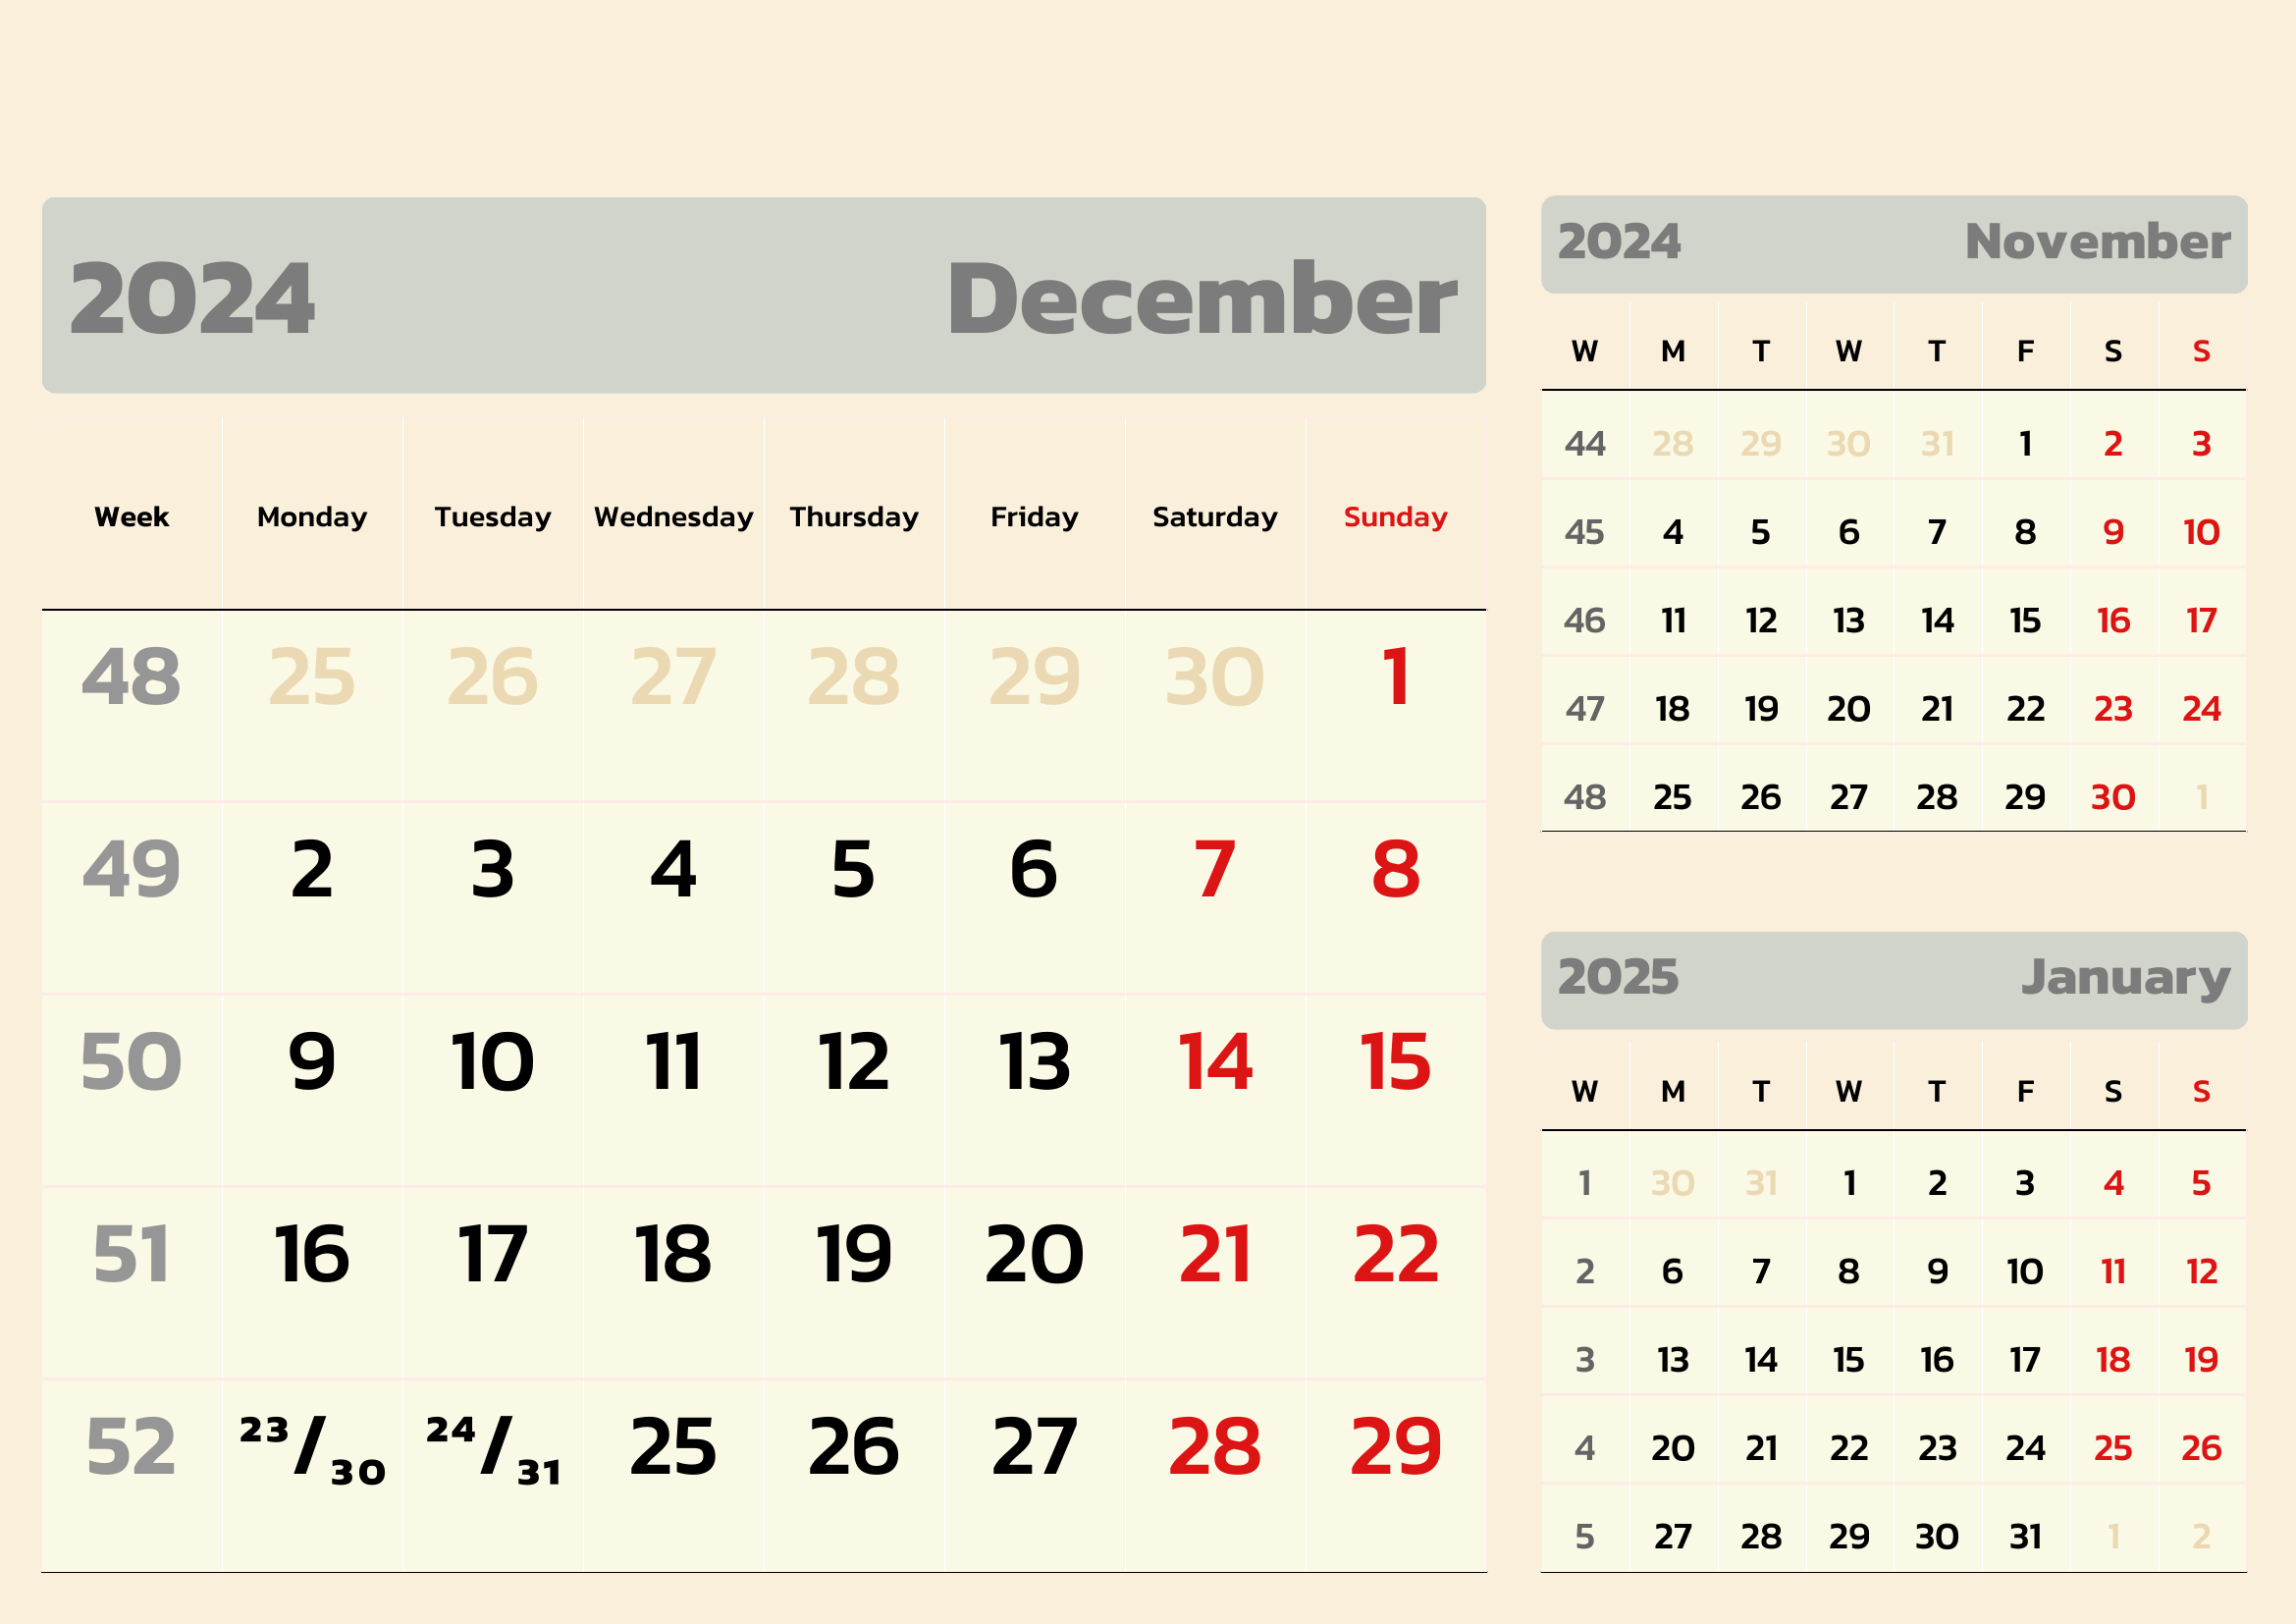

In [13]:
import io
from PIL import Image
from pdf2image import convert_from_path
from IPython.display import Image, display

images = convert_from_path("/content/Calendar.pdf")
for i, image in enumerate(images):
    fname = "image" + str(i) + ".png"
    image.save(fname, "PNG")
    display(Image(fname, width=282, height=200))


In [10]:
!pip freeze > requirements.txt